In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [0]:
x_train = x_train/127.5-1

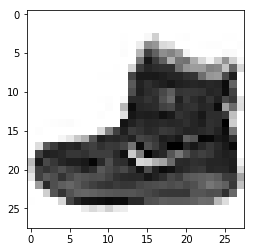

In [4]:
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [0]:
x_train = np.expand_dims(x_train, axis=3)

In [0]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [7]:
latent_dim = 100
height = 28
width = 28
channels = 1
noise = Input(shape=(latent_dim,))
img_shape = (height, width, channels)

In [8]:
def build_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=latent_dim))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  #model.add(Dense(2048))
  #model.add(LeakyReLU(alpha=0.2))
  #model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod(img_shape), activation='tanh'))
  model.add(Reshape(img_shape))

  model.summary()

  img = model(noise)

  return Model(noise, img)

generator = build_generator()
z = Input(shape=(100,))
img = generator(z)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 1024)           

In [9]:
def create_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=img_shape))
  #model.add(Dense(512))
  #model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=img_shape)
  validity = model(img)

  return Model(img, validity)

discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [0]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [0]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, 100))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.546982, acc.: 51.56%] [G loss: 0.426306]


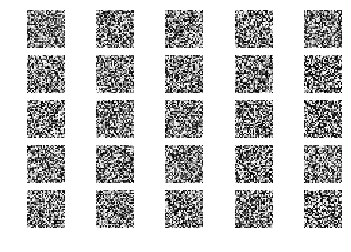

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.554876, acc.: 56.25%] [G loss: 0.494025]
2 [D loss: 0.498412, acc.: 59.38%] [G loss: 0.578054]
3 [D loss: 0.451115, acc.: 64.06%] [G loss: 0.715108]
4 [D loss: 0.369966, acc.: 73.44%] [G loss: 0.827679]
5 [D loss: 0.329495, acc.: 87.50%] [G loss: 1.008266]
6 [D loss: 0.255148, acc.: 95.31%] [G loss: 1.130077]
7 [D loss: 0.211507, acc.: 100.00%] [G loss: 1.239548]
8 [D loss: 0.191641, acc.: 100.00%] [G loss: 1.341864]
9 [D loss: 0.202660, acc.: 100.00%] [G loss: 1.480353]
10 [D loss: 0.162291, acc.: 100.00%] [G loss: 1.637463]
11 [D loss: 0.124818, acc.: 100.00%] [G loss: 1.625354]
12 [D loss: 0.134306, acc.: 100.00%] [G loss: 1.664284]
13 [D loss: 0.119100, acc.: 100.00%] [G loss: 1.840542]
14 [D loss: 0.115041, acc.: 100.00%] [G loss: 1.937966]
15 [D loss: 0.094522, acc.: 100.00%] [G loss: 1.985669]
16 [D loss: 0.111030, acc.: 100.00%] [G loss: 2.115225]
17 [D loss: 0.085052, acc.: 100.00%] [G loss: 2.193763]
18 [D loss: 0.073922, acc.: 100.00%] [G loss: 2.151612]
19 [D l

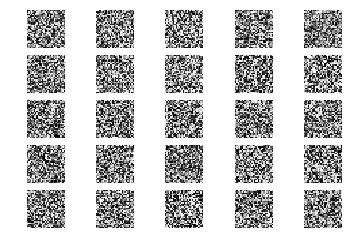

51 [D loss: 0.025195, acc.: 100.00%] [G loss: 3.547647]
52 [D loss: 0.023474, acc.: 100.00%] [G loss: 3.446273]
53 [D loss: 0.024615, acc.: 100.00%] [G loss: 3.541966]
54 [D loss: 0.019429, acc.: 100.00%] [G loss: 3.533159]
55 [D loss: 0.019987, acc.: 100.00%] [G loss: 3.579418]
56 [D loss: 0.024215, acc.: 100.00%] [G loss: 3.412559]
57 [D loss: 0.019656, acc.: 100.00%] [G loss: 3.640379]
58 [D loss: 0.023124, acc.: 100.00%] [G loss: 3.616438]
59 [D loss: 0.029952, acc.: 100.00%] [G loss: 3.676604]
60 [D loss: 0.021725, acc.: 100.00%] [G loss: 3.702689]
61 [D loss: 0.020110, acc.: 100.00%] [G loss: 3.676268]
62 [D loss: 0.018705, acc.: 100.00%] [G loss: 3.698996]
63 [D loss: 0.019647, acc.: 100.00%] [G loss: 3.740604]
64 [D loss: 0.018031, acc.: 100.00%] [G loss: 3.823164]
65 [D loss: 0.024673, acc.: 100.00%] [G loss: 3.861343]
66 [D loss: 0.018059, acc.: 100.00%] [G loss: 3.824060]
67 [D loss: 0.020435, acc.: 100.00%] [G loss: 3.717481]
68 [D loss: 0.021874, acc.: 100.00%] [G loss: 3.

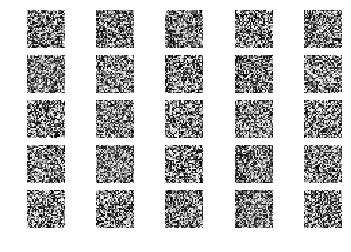

101 [D loss: 0.053843, acc.: 98.44%] [G loss: 4.460747]
102 [D loss: 0.020879, acc.: 100.00%] [G loss: 4.483240]
103 [D loss: 0.014567, acc.: 100.00%] [G loss: 4.211100]
104 [D loss: 0.020298, acc.: 100.00%] [G loss: 4.464143]
105 [D loss: 0.011559, acc.: 100.00%] [G loss: 4.491816]
106 [D loss: 0.016434, acc.: 100.00%] [G loss: 4.514358]
107 [D loss: 0.014822, acc.: 100.00%] [G loss: 4.503030]
108 [D loss: 0.012273, acc.: 100.00%] [G loss: 4.503441]
109 [D loss: 0.013972, acc.: 100.00%] [G loss: 4.453279]
110 [D loss: 0.010713, acc.: 100.00%] [G loss: 4.452121]
111 [D loss: 0.014475, acc.: 100.00%] [G loss: 4.466840]
112 [D loss: 0.018681, acc.: 100.00%] [G loss: 4.395679]
113 [D loss: 0.009936, acc.: 100.00%] [G loss: 4.434882]
114 [D loss: 0.019513, acc.: 100.00%] [G loss: 4.542522]
115 [D loss: 0.012471, acc.: 100.00%] [G loss: 4.562452]
116 [D loss: 0.024720, acc.: 100.00%] [G loss: 4.512027]
117 [D loss: 0.012289, acc.: 100.00%] [G loss: 4.427486]
118 [D loss: 0.021129, acc.: 100

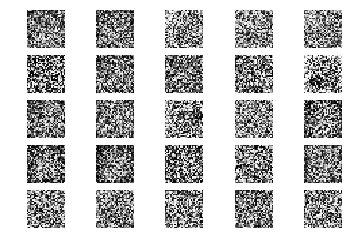

151 [D loss: 0.018492, acc.: 100.00%] [G loss: 4.521877]
152 [D loss: 0.040623, acc.: 100.00%] [G loss: 4.793708]
153 [D loss: 0.013446, acc.: 100.00%] [G loss: 5.022029]
154 [D loss: 0.042973, acc.: 100.00%] [G loss: 4.383633]
155 [D loss: 0.022368, acc.: 100.00%] [G loss: 4.554736]
156 [D loss: 0.021838, acc.: 100.00%] [G loss: 4.701157]
157 [D loss: 0.037185, acc.: 100.00%] [G loss: 4.811602]
158 [D loss: 0.016593, acc.: 100.00%] [G loss: 4.523893]
159 [D loss: 0.046326, acc.: 100.00%] [G loss: 4.458323]
160 [D loss: 0.078435, acc.: 96.88%] [G loss: 4.825170]
161 [D loss: 0.031934, acc.: 100.00%] [G loss: 4.677685]
162 [D loss: 0.023306, acc.: 100.00%] [G loss: 4.829710]
163 [D loss: 0.028747, acc.: 100.00%] [G loss: 4.880552]
164 [D loss: 0.090143, acc.: 95.31%] [G loss: 5.361179]
165 [D loss: 0.111818, acc.: 95.31%] [G loss: 4.296503]
166 [D loss: 0.060955, acc.: 98.44%] [G loss: 4.293726]
167 [D loss: 0.035511, acc.: 100.00%] [G loss: 4.369397]
168 [D loss: 0.201957, acc.: 87.50%

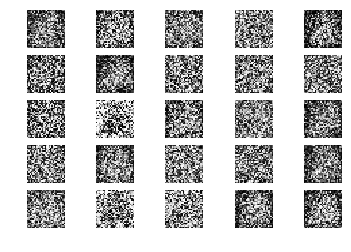

201 [D loss: 0.058836, acc.: 98.44%] [G loss: 4.379170]
202 [D loss: 0.083563, acc.: 98.44%] [G loss: 4.682830]
203 [D loss: 0.139203, acc.: 93.75%] [G loss: 4.001050]
204 [D loss: 0.074600, acc.: 98.44%] [G loss: 4.323493]
205 [D loss: 0.175185, acc.: 95.31%] [G loss: 4.394749]
206 [D loss: 0.077746, acc.: 98.44%] [G loss: 4.289205]
207 [D loss: 0.218293, acc.: 93.75%] [G loss: 3.637264]
208 [D loss: 0.117282, acc.: 93.75%] [G loss: 4.753999]
209 [D loss: 0.152235, acc.: 93.75%] [G loss: 4.700674]
210 [D loss: 0.145452, acc.: 93.75%] [G loss: 4.528588]
211 [D loss: 0.153696, acc.: 90.62%] [G loss: 5.024798]
212 [D loss: 0.290311, acc.: 90.62%] [G loss: 4.037718]
213 [D loss: 0.228875, acc.: 92.19%] [G loss: 4.767090]
214 [D loss: 0.062015, acc.: 100.00%] [G loss: 4.782006]
215 [D loss: 0.296394, acc.: 87.50%] [G loss: 3.494080]
216 [D loss: 0.118577, acc.: 95.31%] [G loss: 4.330213]
217 [D loss: 0.146866, acc.: 96.88%] [G loss: 3.917045]
218 [D loss: 0.072660, acc.: 96.88%] [G loss: 4

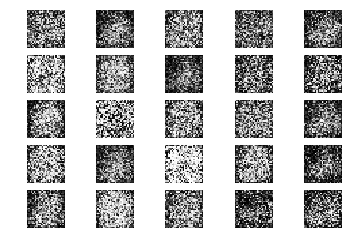

251 [D loss: 0.134440, acc.: 96.88%] [G loss: 4.148787]
252 [D loss: 0.129252, acc.: 96.88%] [G loss: 4.269489]
253 [D loss: 0.259681, acc.: 90.62%] [G loss: 4.362804]
254 [D loss: 0.641082, acc.: 70.31%] [G loss: 4.718792]
255 [D loss: 0.393301, acc.: 81.25%] [G loss: 3.643307]
256 [D loss: 0.189839, acc.: 89.06%] [G loss: 4.206805]
257 [D loss: 0.500626, acc.: 78.12%] [G loss: 3.121793]
258 [D loss: 0.117761, acc.: 96.88%] [G loss: 3.291720]
259 [D loss: 0.141047, acc.: 95.31%] [G loss: 4.226082]
260 [D loss: 0.147037, acc.: 93.75%] [G loss: 3.682263]
261 [D loss: 0.114388, acc.: 98.44%] [G loss: 3.748210]
262 [D loss: 0.140370, acc.: 93.75%] [G loss: 4.228525]
263 [D loss: 0.239307, acc.: 93.75%] [G loss: 3.789318]
264 [D loss: 0.339247, acc.: 81.25%] [G loss: 4.261309]
265 [D loss: 0.232329, acc.: 89.06%] [G loss: 3.288757]
266 [D loss: 0.274670, acc.: 82.81%] [G loss: 4.062555]
267 [D loss: 0.350783, acc.: 82.81%] [G loss: 3.243705]
268 [D loss: 0.231154, acc.: 89.06%] [G loss: 3.

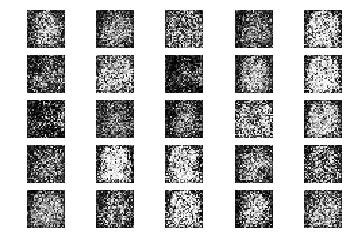

301 [D loss: 0.518107, acc.: 85.94%] [G loss: 3.242853]
302 [D loss: 0.279179, acc.: 90.62%] [G loss: 3.109273]
303 [D loss: 0.319007, acc.: 87.50%] [G loss: 3.619548]
304 [D loss: 0.176801, acc.: 96.88%] [G loss: 3.284589]
305 [D loss: 0.500905, acc.: 84.38%] [G loss: 3.261625]
306 [D loss: 0.346035, acc.: 87.50%] [G loss: 3.023778]
307 [D loss: 0.334558, acc.: 82.81%] [G loss: 2.750471]
308 [D loss: 0.270868, acc.: 85.94%] [G loss: 3.252215]
309 [D loss: 0.214273, acc.: 93.75%] [G loss: 3.040381]
310 [D loss: 0.392067, acc.: 84.38%] [G loss: 3.386264]
311 [D loss: 0.383509, acc.: 81.25%] [G loss: 3.721401]
312 [D loss: 0.268286, acc.: 93.75%] [G loss: 3.209246]
313 [D loss: 0.354277, acc.: 89.06%] [G loss: 3.535808]
314 [D loss: 0.195402, acc.: 93.75%] [G loss: 3.797111]
315 [D loss: 0.388083, acc.: 79.69%] [G loss: 3.422549]
316 [D loss: 0.110172, acc.: 96.88%] [G loss: 3.872403]
317 [D loss: 0.238004, acc.: 95.31%] [G loss: 2.747470]
318 [D loss: 0.537646, acc.: 71.88%] [G loss: 3.

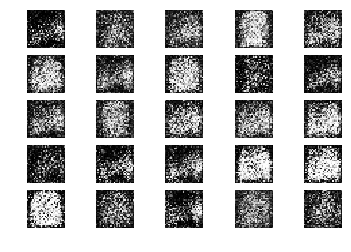

351 [D loss: 1.003610, acc.: 59.38%] [G loss: 2.372013]
352 [D loss: 0.544459, acc.: 70.31%] [G loss: 2.604686]
353 [D loss: 0.575552, acc.: 81.25%] [G loss: 2.353481]
354 [D loss: 0.416063, acc.: 79.69%] [G loss: 2.947958]
355 [D loss: 0.440666, acc.: 89.06%] [G loss: 2.636930]
356 [D loss: 0.484076, acc.: 78.12%] [G loss: 2.203383]
357 [D loss: 0.306875, acc.: 90.62%] [G loss: 2.404153]
358 [D loss: 0.497149, acc.: 87.50%] [G loss: 2.612914]
359 [D loss: 0.774256, acc.: 56.25%] [G loss: 2.005630]
360 [D loss: 0.433616, acc.: 85.94%] [G loss: 2.451088]
361 [D loss: 0.475189, acc.: 78.12%] [G loss: 3.112664]
362 [D loss: 0.813902, acc.: 56.25%] [G loss: 2.075673]
363 [D loss: 0.447467, acc.: 82.81%] [G loss: 2.262286]
364 [D loss: 0.603416, acc.: 64.06%] [G loss: 2.457805]
365 [D loss: 0.808062, acc.: 67.19%] [G loss: 2.512268]
366 [D loss: 0.528428, acc.: 71.88%] [G loss: 2.228212]
367 [D loss: 0.561862, acc.: 68.75%] [G loss: 2.278829]
368 [D loss: 0.439461, acc.: 81.25%] [G loss: 2.

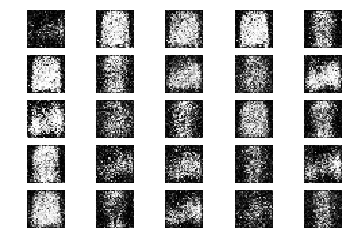

401 [D loss: 0.662280, acc.: 70.31%] [G loss: 1.789658]
402 [D loss: 0.708149, acc.: 67.19%] [G loss: 1.764111]
403 [D loss: 0.575556, acc.: 71.88%] [G loss: 1.598181]
404 [D loss: 0.562873, acc.: 76.56%] [G loss: 1.667449]
405 [D loss: 0.641797, acc.: 71.88%] [G loss: 1.687007]
406 [D loss: 0.825557, acc.: 56.25%] [G loss: 1.332018]
407 [D loss: 0.567558, acc.: 73.44%] [G loss: 1.487080]
408 [D loss: 0.646163, acc.: 64.06%] [G loss: 1.826887]
409 [D loss: 0.592139, acc.: 76.56%] [G loss: 1.557207]
410 [D loss: 0.477481, acc.: 78.12%] [G loss: 1.396466]
411 [D loss: 0.572797, acc.: 68.75%] [G loss: 1.486698]
412 [D loss: 0.505328, acc.: 75.00%] [G loss: 1.440193]
413 [D loss: 0.715085, acc.: 57.81%] [G loss: 1.479814]
414 [D loss: 0.573363, acc.: 78.12%] [G loss: 1.446615]
415 [D loss: 0.638473, acc.: 64.06%] [G loss: 1.521735]
416 [D loss: 0.695002, acc.: 75.00%] [G loss: 1.322553]
417 [D loss: 0.837272, acc.: 65.62%] [G loss: 1.309333]
418 [D loss: 0.620388, acc.: 64.06%] [G loss: 1.

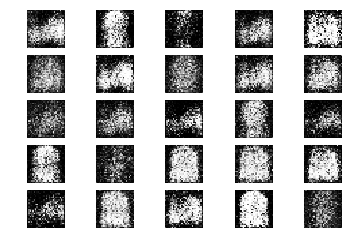

451 [D loss: 0.663190, acc.: 57.81%] [G loss: 0.995545]
452 [D loss: 0.607152, acc.: 67.19%] [G loss: 1.056843]
453 [D loss: 0.600309, acc.: 70.31%] [G loss: 1.261079]
454 [D loss: 0.586973, acc.: 64.06%] [G loss: 1.151203]
455 [D loss: 0.728735, acc.: 45.31%] [G loss: 1.084347]
456 [D loss: 0.664050, acc.: 53.12%] [G loss: 1.120767]
457 [D loss: 0.737900, acc.: 57.81%] [G loss: 0.980594]
458 [D loss: 0.693507, acc.: 56.25%] [G loss: 1.150502]
459 [D loss: 0.760573, acc.: 50.00%] [G loss: 1.061122]
460 [D loss: 0.662455, acc.: 65.62%] [G loss: 1.115985]
461 [D loss: 0.693663, acc.: 57.81%] [G loss: 1.157908]
462 [D loss: 0.630623, acc.: 65.62%] [G loss: 1.234223]
463 [D loss: 0.740945, acc.: 53.12%] [G loss: 1.119302]
464 [D loss: 0.652284, acc.: 59.38%] [G loss: 1.037807]
465 [D loss: 0.694992, acc.: 62.50%] [G loss: 1.060220]
466 [D loss: 0.623956, acc.: 68.75%] [G loss: 1.035542]
467 [D loss: 0.624124, acc.: 71.88%] [G loss: 1.057534]
468 [D loss: 0.699281, acc.: 62.50%] [G loss: 1.

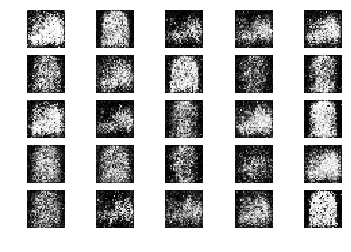

501 [D loss: 0.554823, acc.: 71.88%] [G loss: 1.125266]
502 [D loss: 0.555829, acc.: 71.88%] [G loss: 1.083355]
503 [D loss: 0.566790, acc.: 73.44%] [G loss: 1.072803]
504 [D loss: 0.571936, acc.: 68.75%] [G loss: 1.127300]
505 [D loss: 0.641378, acc.: 67.19%] [G loss: 1.162529]
506 [D loss: 0.553573, acc.: 73.44%] [G loss: 1.121177]
507 [D loss: 0.481826, acc.: 78.12%] [G loss: 1.170286]
508 [D loss: 0.613508, acc.: 67.19%] [G loss: 1.154428]
509 [D loss: 0.577502, acc.: 70.31%] [G loss: 1.061671]
510 [D loss: 0.551420, acc.: 75.00%] [G loss: 1.238686]
511 [D loss: 0.608114, acc.: 64.06%] [G loss: 1.133996]
512 [D loss: 0.505757, acc.: 79.69%] [G loss: 1.328266]
513 [D loss: 0.734282, acc.: 59.38%] [G loss: 1.009819]
514 [D loss: 0.615326, acc.: 59.38%] [G loss: 1.092142]
515 [D loss: 0.558112, acc.: 67.19%] [G loss: 1.097964]
516 [D loss: 0.596398, acc.: 71.88%] [G loss: 1.158128]
517 [D loss: 0.562612, acc.: 76.56%] [G loss: 1.184480]
518 [D loss: 0.522368, acc.: 73.44%] [G loss: 1.

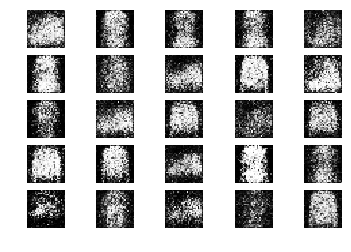

551 [D loss: 0.516135, acc.: 76.56%] [G loss: 1.236057]
552 [D loss: 0.636656, acc.: 70.31%] [G loss: 1.162347]
553 [D loss: 0.577780, acc.: 67.19%] [G loss: 1.028634]
554 [D loss: 0.563773, acc.: 71.88%] [G loss: 1.126459]
555 [D loss: 0.586008, acc.: 67.19%] [G loss: 1.146152]
556 [D loss: 0.593036, acc.: 68.75%] [G loss: 1.180017]
557 [D loss: 0.597219, acc.: 67.19%] [G loss: 1.186308]
558 [D loss: 0.530094, acc.: 76.56%] [G loss: 1.162811]
559 [D loss: 0.471448, acc.: 81.25%] [G loss: 1.218443]
560 [D loss: 0.600537, acc.: 76.56%] [G loss: 1.212713]
561 [D loss: 0.633420, acc.: 65.62%] [G loss: 1.161683]
562 [D loss: 0.635314, acc.: 68.75%] [G loss: 1.075599]
563 [D loss: 0.583711, acc.: 70.31%] [G loss: 1.050792]
564 [D loss: 0.636427, acc.: 68.75%] [G loss: 1.165944]
565 [D loss: 0.650440, acc.: 67.19%] [G loss: 1.041712]
566 [D loss: 0.586071, acc.: 65.62%] [G loss: 1.148393]
567 [D loss: 0.734154, acc.: 59.38%] [G loss: 1.220453]
568 [D loss: 0.591037, acc.: 68.75%] [G loss: 1.

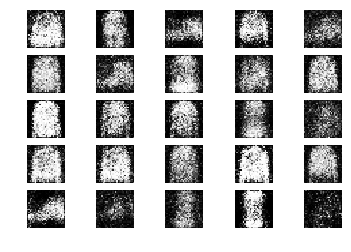

601 [D loss: 0.586250, acc.: 70.31%] [G loss: 1.039344]
602 [D loss: 0.524277, acc.: 78.12%] [G loss: 1.143400]
603 [D loss: 0.566661, acc.: 68.75%] [G loss: 1.181103]
604 [D loss: 0.598984, acc.: 70.31%] [G loss: 1.054775]
605 [D loss: 0.692651, acc.: 57.81%] [G loss: 1.060291]
606 [D loss: 0.593642, acc.: 68.75%] [G loss: 1.045126]
607 [D loss: 0.644221, acc.: 65.62%] [G loss: 0.838013]
608 [D loss: 0.608621, acc.: 65.62%] [G loss: 0.982714]
609 [D loss: 0.555136, acc.: 73.44%] [G loss: 1.095727]
610 [D loss: 0.567470, acc.: 67.19%] [G loss: 1.077732]
611 [D loss: 0.642867, acc.: 70.31%] [G loss: 0.984090]
612 [D loss: 0.611921, acc.: 68.75%] [G loss: 1.057361]
613 [D loss: 0.596509, acc.: 64.06%] [G loss: 1.068882]
614 [D loss: 0.610025, acc.: 70.31%] [G loss: 0.951958]
615 [D loss: 0.657785, acc.: 56.25%] [G loss: 1.092903]
616 [D loss: 0.546471, acc.: 67.19%] [G loss: 1.187572]
617 [D loss: 0.605097, acc.: 62.50%] [G loss: 1.122625]
618 [D loss: 0.550649, acc.: 75.00%] [G loss: 1.

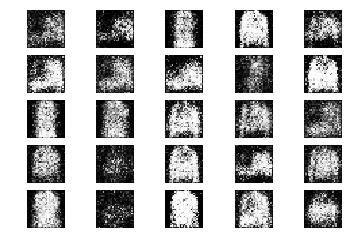

651 [D loss: 0.530951, acc.: 73.44%] [G loss: 1.056481]
652 [D loss: 0.635970, acc.: 65.62%] [G loss: 1.049109]
653 [D loss: 0.692465, acc.: 62.50%] [G loss: 0.983451]
654 [D loss: 0.576248, acc.: 71.88%] [G loss: 1.172482]
655 [D loss: 0.595566, acc.: 65.62%] [G loss: 1.063687]
656 [D loss: 0.607196, acc.: 67.19%] [G loss: 0.944633]
657 [D loss: 0.653333, acc.: 60.94%] [G loss: 0.942649]
658 [D loss: 0.666888, acc.: 59.38%] [G loss: 0.949317]
659 [D loss: 0.685641, acc.: 57.81%] [G loss: 0.966971]
660 [D loss: 0.675390, acc.: 60.94%] [G loss: 0.913718]
661 [D loss: 0.588601, acc.: 65.62%] [G loss: 1.093005]
662 [D loss: 0.565745, acc.: 71.88%] [G loss: 1.160416]
663 [D loss: 0.635190, acc.: 67.19%] [G loss: 1.100738]
664 [D loss: 0.789993, acc.: 54.69%] [G loss: 1.059340]
665 [D loss: 0.625015, acc.: 65.62%] [G loss: 0.985244]
666 [D loss: 0.573141, acc.: 67.19%] [G loss: 0.994594]
667 [D loss: 0.517248, acc.: 79.69%] [G loss: 0.995919]
668 [D loss: 0.612324, acc.: 68.75%] [G loss: 0.

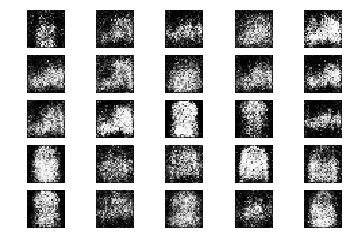

701 [D loss: 0.684433, acc.: 62.50%] [G loss: 0.890396]
702 [D loss: 0.543619, acc.: 78.12%] [G loss: 0.890661]
703 [D loss: 0.547756, acc.: 75.00%] [G loss: 1.121450]
704 [D loss: 0.632901, acc.: 68.75%] [G loss: 1.076157]
705 [D loss: 0.607235, acc.: 71.88%] [G loss: 0.964778]
706 [D loss: 0.715536, acc.: 54.69%] [G loss: 0.975278]
707 [D loss: 0.644682, acc.: 56.25%] [G loss: 1.031680]
708 [D loss: 0.550945, acc.: 75.00%] [G loss: 0.977854]
709 [D loss: 0.582699, acc.: 70.31%] [G loss: 1.033072]
710 [D loss: 0.548144, acc.: 68.75%] [G loss: 0.998935]
711 [D loss: 0.659990, acc.: 62.50%] [G loss: 0.961396]
712 [D loss: 0.591754, acc.: 70.31%] [G loss: 0.969846]
713 [D loss: 0.575535, acc.: 70.31%] [G loss: 1.065818]
714 [D loss: 0.614736, acc.: 64.06%] [G loss: 1.051266]
715 [D loss: 0.601620, acc.: 71.88%] [G loss: 0.993841]
716 [D loss: 0.552590, acc.: 76.56%] [G loss: 1.098140]
717 [D loss: 0.580237, acc.: 65.62%] [G loss: 1.015030]
718 [D loss: 0.563615, acc.: 73.44%] [G loss: 1.

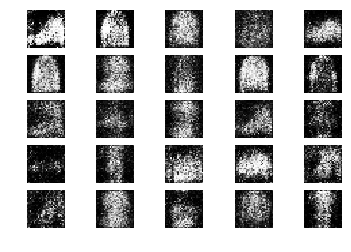

751 [D loss: 0.595770, acc.: 71.88%] [G loss: 1.053555]
752 [D loss: 0.613869, acc.: 73.44%] [G loss: 0.979903]
753 [D loss: 0.657228, acc.: 62.50%] [G loss: 0.913850]
754 [D loss: 0.603227, acc.: 68.75%] [G loss: 0.938534]
755 [D loss: 0.611533, acc.: 57.81%] [G loss: 1.064407]
756 [D loss: 0.678061, acc.: 59.38%] [G loss: 0.985893]
757 [D loss: 0.617514, acc.: 60.94%] [G loss: 0.999643]
758 [D loss: 0.540161, acc.: 79.69%] [G loss: 0.929444]
759 [D loss: 0.644851, acc.: 64.06%] [G loss: 1.014638]
760 [D loss: 0.603851, acc.: 68.75%] [G loss: 1.080280]
761 [D loss: 0.642936, acc.: 60.94%] [G loss: 0.998525]
762 [D loss: 0.652872, acc.: 59.38%] [G loss: 1.014359]
763 [D loss: 0.585473, acc.: 76.56%] [G loss: 0.967076]
764 [D loss: 0.623692, acc.: 60.94%] [G loss: 0.990830]
765 [D loss: 0.643752, acc.: 62.50%] [G loss: 1.005809]
766 [D loss: 0.701798, acc.: 59.38%] [G loss: 0.937274]
767 [D loss: 0.573406, acc.: 73.44%] [G loss: 0.921591]
768 [D loss: 0.569302, acc.: 64.06%] [G loss: 0.

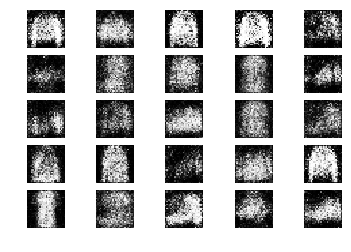

801 [D loss: 0.552152, acc.: 68.75%] [G loss: 1.005406]
802 [D loss: 0.690413, acc.: 62.50%] [G loss: 1.027019]
803 [D loss: 0.583623, acc.: 68.75%] [G loss: 0.940439]
804 [D loss: 0.609761, acc.: 70.31%] [G loss: 0.979909]
805 [D loss: 0.599807, acc.: 67.19%] [G loss: 1.026880]
806 [D loss: 0.634318, acc.: 62.50%] [G loss: 0.954226]
807 [D loss: 0.581297, acc.: 70.31%] [G loss: 0.939948]
808 [D loss: 0.546665, acc.: 65.62%] [G loss: 1.059445]
809 [D loss: 0.515246, acc.: 82.81%] [G loss: 1.048185]
810 [D loss: 0.645898, acc.: 65.62%] [G loss: 1.059976]
811 [D loss: 0.625581, acc.: 62.50%] [G loss: 0.952942]
812 [D loss: 0.591694, acc.: 67.19%] [G loss: 0.927826]
813 [D loss: 0.560787, acc.: 71.88%] [G loss: 0.867701]
814 [D loss: 0.601107, acc.: 67.19%] [G loss: 0.930372]
815 [D loss: 0.588811, acc.: 73.44%] [G loss: 1.102990]
816 [D loss: 0.615530, acc.: 67.19%] [G loss: 0.964248]
817 [D loss: 0.561366, acc.: 78.12%] [G loss: 1.017376]
818 [D loss: 0.624382, acc.: 65.62%] [G loss: 1.

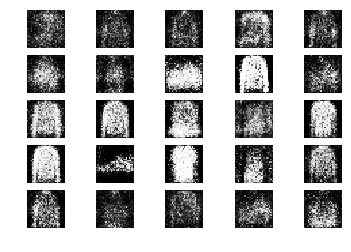

851 [D loss: 0.601161, acc.: 64.06%] [G loss: 0.861098]
852 [D loss: 0.614180, acc.: 73.44%] [G loss: 0.891939]
853 [D loss: 0.583722, acc.: 71.88%] [G loss: 0.944797]
854 [D loss: 0.588491, acc.: 76.56%] [G loss: 0.904261]
855 [D loss: 0.630527, acc.: 60.94%] [G loss: 0.898399]
856 [D loss: 0.623370, acc.: 65.62%] [G loss: 0.930113]
857 [D loss: 0.658862, acc.: 64.06%] [G loss: 1.006485]
858 [D loss: 0.567022, acc.: 70.31%] [G loss: 1.007110]
859 [D loss: 0.583735, acc.: 68.75%] [G loss: 0.904944]
860 [D loss: 0.634074, acc.: 60.94%] [G loss: 0.952028]
861 [D loss: 0.592262, acc.: 73.44%] [G loss: 0.969499]
862 [D loss: 0.522278, acc.: 78.12%] [G loss: 0.914853]
863 [D loss: 0.711355, acc.: 51.56%] [G loss: 1.076138]
864 [D loss: 0.492077, acc.: 81.25%] [G loss: 1.085240]
865 [D loss: 0.519493, acc.: 84.38%] [G loss: 0.987856]
866 [D loss: 0.558698, acc.: 75.00%] [G loss: 0.988963]
867 [D loss: 0.601203, acc.: 64.06%] [G loss: 1.040215]
868 [D loss: 0.581443, acc.: 67.19%] [G loss: 1.

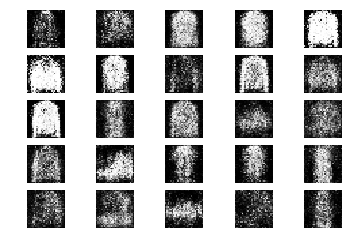

901 [D loss: 0.600674, acc.: 67.19%] [G loss: 0.947460]
902 [D loss: 0.588489, acc.: 71.88%] [G loss: 0.963540]
903 [D loss: 0.558853, acc.: 75.00%] [G loss: 1.059027]
904 [D loss: 0.582041, acc.: 68.75%] [G loss: 0.989017]
905 [D loss: 0.622763, acc.: 68.75%] [G loss: 0.930887]
906 [D loss: 0.578657, acc.: 71.88%] [G loss: 1.014960]
907 [D loss: 0.574902, acc.: 73.44%] [G loss: 1.106120]
908 [D loss: 0.640845, acc.: 57.81%] [G loss: 0.943226]
909 [D loss: 0.562866, acc.: 71.88%] [G loss: 0.926287]
910 [D loss: 0.542844, acc.: 68.75%] [G loss: 1.032352]
911 [D loss: 0.545353, acc.: 76.56%] [G loss: 1.011770]
912 [D loss: 0.607194, acc.: 67.19%] [G loss: 0.936306]
913 [D loss: 0.642616, acc.: 59.38%] [G loss: 0.898128]
914 [D loss: 0.587921, acc.: 73.44%] [G loss: 0.963776]
915 [D loss: 0.611074, acc.: 62.50%] [G loss: 1.151412]
916 [D loss: 0.692554, acc.: 50.00%] [G loss: 0.996105]
917 [D loss: 0.634089, acc.: 62.50%] [G loss: 1.082893]
918 [D loss: 0.542664, acc.: 75.00%] [G loss: 1.

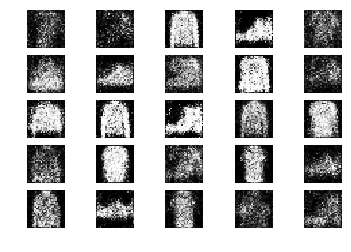

951 [D loss: 0.559849, acc.: 71.88%] [G loss: 1.007376]
952 [D loss: 0.621087, acc.: 64.06%] [G loss: 0.926886]
953 [D loss: 0.551429, acc.: 73.44%] [G loss: 0.889282]
954 [D loss: 0.591202, acc.: 64.06%] [G loss: 1.017964]
955 [D loss: 0.590401, acc.: 65.62%] [G loss: 1.028938]
956 [D loss: 0.649227, acc.: 65.62%] [G loss: 1.080937]
957 [D loss: 0.542936, acc.: 73.44%] [G loss: 0.996933]
958 [D loss: 0.630466, acc.: 57.81%] [G loss: 0.938425]
959 [D loss: 0.655281, acc.: 53.12%] [G loss: 0.956932]
960 [D loss: 0.555045, acc.: 65.62%] [G loss: 0.986324]
961 [D loss: 0.603589, acc.: 65.62%] [G loss: 0.972804]
962 [D loss: 0.628527, acc.: 64.06%] [G loss: 0.926194]
963 [D loss: 0.563645, acc.: 65.62%] [G loss: 0.953836]
964 [D loss: 0.659472, acc.: 67.19%] [G loss: 0.931638]
965 [D loss: 0.626481, acc.: 62.50%] [G loss: 0.968120]
966 [D loss: 0.610675, acc.: 67.19%] [G loss: 0.914214]
967 [D loss: 0.573420, acc.: 71.88%] [G loss: 0.947417]
968 [D loss: 0.538091, acc.: 75.00%] [G loss: 0.

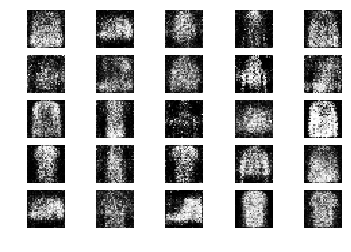

1001 [D loss: 0.586681, acc.: 76.56%] [G loss: 1.119085]
1002 [D loss: 0.621547, acc.: 60.94%] [G loss: 1.003075]
1003 [D loss: 0.645036, acc.: 64.06%] [G loss: 0.919372]
1004 [D loss: 0.581253, acc.: 68.75%] [G loss: 0.925673]
1005 [D loss: 0.562831, acc.: 73.44%] [G loss: 0.977190]
1006 [D loss: 0.563261, acc.: 79.69%] [G loss: 1.036653]
1007 [D loss: 0.601585, acc.: 67.19%] [G loss: 1.022225]
1008 [D loss: 0.641336, acc.: 65.62%] [G loss: 1.034147]
1009 [D loss: 0.656225, acc.: 64.06%] [G loss: 0.852457]
1010 [D loss: 0.605754, acc.: 67.19%] [G loss: 0.990740]
1011 [D loss: 0.708816, acc.: 51.56%] [G loss: 0.944498]
1012 [D loss: 0.634065, acc.: 60.94%] [G loss: 0.925877]
1013 [D loss: 0.604013, acc.: 65.62%] [G loss: 0.957275]
1014 [D loss: 0.609417, acc.: 70.31%] [G loss: 0.994253]
1015 [D loss: 0.600922, acc.: 71.88%] [G loss: 0.998866]
1016 [D loss: 0.620665, acc.: 65.62%] [G loss: 1.010475]
1017 [D loss: 0.608344, acc.: 71.88%] [G loss: 0.972047]
1018 [D loss: 0.622584, acc.: 6

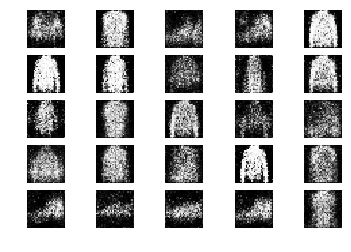

1051 [D loss: 0.624534, acc.: 71.88%] [G loss: 0.900456]
1052 [D loss: 0.601896, acc.: 64.06%] [G loss: 1.019127]
1053 [D loss: 0.587947, acc.: 67.19%] [G loss: 1.051226]
1054 [D loss: 0.624093, acc.: 65.62%] [G loss: 1.033281]
1055 [D loss: 0.654190, acc.: 68.75%] [G loss: 0.993602]
1056 [D loss: 0.622307, acc.: 68.75%] [G loss: 0.844457]
1057 [D loss: 0.643703, acc.: 60.94%] [G loss: 0.861643]
1058 [D loss: 0.657955, acc.: 62.50%] [G loss: 0.890735]
1059 [D loss: 0.569372, acc.: 71.88%] [G loss: 0.805574]
1060 [D loss: 0.635947, acc.: 57.81%] [G loss: 0.899765]
1061 [D loss: 0.549522, acc.: 70.31%] [G loss: 0.951419]
1062 [D loss: 0.687418, acc.: 54.69%] [G loss: 1.000203]
1063 [D loss: 0.562290, acc.: 71.88%] [G loss: 0.904965]
1064 [D loss: 0.659364, acc.: 64.06%] [G loss: 0.935171]
1065 [D loss: 0.569680, acc.: 73.44%] [G loss: 0.924403]
1066 [D loss: 0.639431, acc.: 56.25%] [G loss: 0.882833]
1067 [D loss: 0.569791, acc.: 70.31%] [G loss: 0.970533]
1068 [D loss: 0.608031, acc.: 6

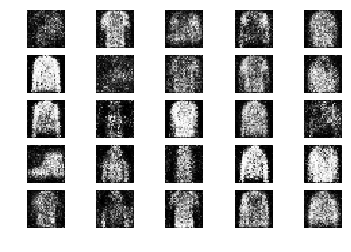

1101 [D loss: 0.608263, acc.: 70.31%] [G loss: 0.844929]
1102 [D loss: 0.687018, acc.: 56.25%] [G loss: 0.869361]
1103 [D loss: 0.636999, acc.: 71.88%] [G loss: 0.877791]
1104 [D loss: 0.677945, acc.: 65.62%] [G loss: 0.993547]
1105 [D loss: 0.636933, acc.: 62.50%] [G loss: 0.924598]
1106 [D loss: 0.591401, acc.: 73.44%] [G loss: 0.882981]
1107 [D loss: 0.735795, acc.: 43.75%] [G loss: 0.859504]
1108 [D loss: 0.611387, acc.: 65.62%] [G loss: 0.886151]
1109 [D loss: 0.593516, acc.: 65.62%] [G loss: 0.870083]
1110 [D loss: 0.574360, acc.: 73.44%] [G loss: 0.901789]
1111 [D loss: 0.572171, acc.: 76.56%] [G loss: 0.912290]
1112 [D loss: 0.552864, acc.: 79.69%] [G loss: 0.970780]
1113 [D loss: 0.584983, acc.: 70.31%] [G loss: 0.932877]
1114 [D loss: 0.527558, acc.: 79.69%] [G loss: 1.044608]
1115 [D loss: 0.602765, acc.: 68.75%] [G loss: 0.996653]
1116 [D loss: 0.701010, acc.: 54.69%] [G loss: 0.884645]
1117 [D loss: 0.529778, acc.: 78.12%] [G loss: 0.906291]
1118 [D loss: 0.564312, acc.: 7

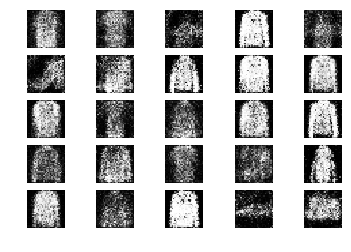

1151 [D loss: 0.551751, acc.: 67.19%] [G loss: 0.912461]
1152 [D loss: 0.626821, acc.: 60.94%] [G loss: 0.927881]
1153 [D loss: 0.584442, acc.: 75.00%] [G loss: 0.969594]
1154 [D loss: 0.623772, acc.: 73.44%] [G loss: 0.965105]
1155 [D loss: 0.630033, acc.: 68.75%] [G loss: 0.868175]
1156 [D loss: 0.648713, acc.: 59.38%] [G loss: 0.907341]
1157 [D loss: 0.562125, acc.: 71.88%] [G loss: 0.971695]
1158 [D loss: 0.616890, acc.: 59.38%] [G loss: 0.961709]
1159 [D loss: 0.606650, acc.: 76.56%] [G loss: 0.926599]
1160 [D loss: 0.679491, acc.: 59.38%] [G loss: 0.868109]
1161 [D loss: 0.666428, acc.: 68.75%] [G loss: 0.917030]
1162 [D loss: 0.653326, acc.: 64.06%] [G loss: 0.862600]
1163 [D loss: 0.618509, acc.: 65.62%] [G loss: 0.907334]
1164 [D loss: 0.659518, acc.: 56.25%] [G loss: 0.912856]
1165 [D loss: 0.595823, acc.: 67.19%] [G loss: 0.928626]
1166 [D loss: 0.648048, acc.: 60.94%] [G loss: 0.957957]
1167 [D loss: 0.643542, acc.: 60.94%] [G loss: 0.870720]
1168 [D loss: 0.631418, acc.: 6

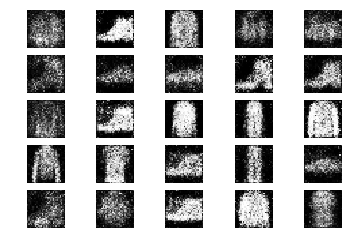

1201 [D loss: 0.568290, acc.: 68.75%] [G loss: 0.866335]
1202 [D loss: 0.597356, acc.: 65.62%] [G loss: 0.973084]
1203 [D loss: 0.613974, acc.: 59.38%] [G loss: 1.043360]
1204 [D loss: 0.669707, acc.: 57.81%] [G loss: 0.918525]
1205 [D loss: 0.641385, acc.: 64.06%] [G loss: 0.923379]
1206 [D loss: 0.612365, acc.: 65.62%] [G loss: 0.942992]
1207 [D loss: 0.638855, acc.: 65.62%] [G loss: 0.948589]
1208 [D loss: 0.649045, acc.: 62.50%] [G loss: 0.950010]
1209 [D loss: 0.635798, acc.: 60.94%] [G loss: 0.971496]
1210 [D loss: 0.620686, acc.: 67.19%] [G loss: 0.969619]
1211 [D loss: 0.581655, acc.: 67.19%] [G loss: 0.831120]
1212 [D loss: 0.630852, acc.: 64.06%] [G loss: 0.979538]
1213 [D loss: 0.580634, acc.: 75.00%] [G loss: 0.841348]
1214 [D loss: 0.655961, acc.: 62.50%] [G loss: 0.874605]
1215 [D loss: 0.661574, acc.: 59.38%] [G loss: 0.929083]
1216 [D loss: 0.582560, acc.: 71.88%] [G loss: 0.911636]
1217 [D loss: 0.565981, acc.: 78.12%] [G loss: 1.046035]
1218 [D loss: 0.619346, acc.: 6

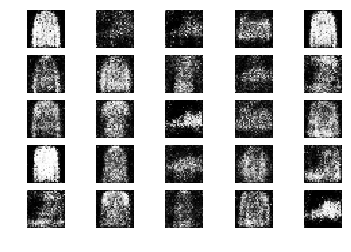

1251 [D loss: 0.592385, acc.: 68.75%] [G loss: 0.792732]
1252 [D loss: 0.667240, acc.: 53.12%] [G loss: 0.965641]
1253 [D loss: 0.570088, acc.: 73.44%] [G loss: 0.934287]
1254 [D loss: 0.587806, acc.: 73.44%] [G loss: 0.981453]
1255 [D loss: 0.616495, acc.: 65.62%] [G loss: 0.949272]
1256 [D loss: 0.576844, acc.: 73.44%] [G loss: 0.940633]
1257 [D loss: 0.660183, acc.: 64.06%] [G loss: 0.888059]
1258 [D loss: 0.694640, acc.: 53.12%] [G loss: 0.968983]
1259 [D loss: 0.595287, acc.: 68.75%] [G loss: 0.945385]
1260 [D loss: 0.595704, acc.: 73.44%] [G loss: 0.881410]
1261 [D loss: 0.582262, acc.: 70.31%] [G loss: 0.894772]
1262 [D loss: 0.589581, acc.: 67.19%] [G loss: 0.935240]
1263 [D loss: 0.559538, acc.: 70.31%] [G loss: 0.913910]
1264 [D loss: 0.589833, acc.: 68.75%] [G loss: 0.934880]
1265 [D loss: 0.591369, acc.: 64.06%] [G loss: 0.903247]
1266 [D loss: 0.630059, acc.: 59.38%] [G loss: 1.008744]
1267 [D loss: 0.683388, acc.: 60.94%] [G loss: 0.871621]
1268 [D loss: 0.639569, acc.: 6

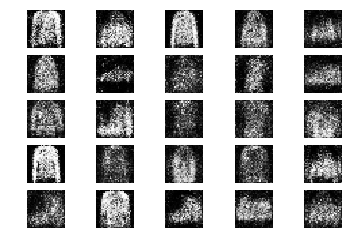

1301 [D loss: 0.648093, acc.: 53.12%] [G loss: 0.906163]
1302 [D loss: 0.628429, acc.: 65.62%] [G loss: 0.894557]
1303 [D loss: 0.629524, acc.: 70.31%] [G loss: 0.964297]
1304 [D loss: 0.572693, acc.: 73.44%] [G loss: 1.018698]
1305 [D loss: 0.641250, acc.: 60.94%] [G loss: 0.894086]
1306 [D loss: 0.603140, acc.: 68.75%] [G loss: 0.906014]
1307 [D loss: 0.557555, acc.: 73.44%] [G loss: 0.919664]
1308 [D loss: 0.632660, acc.: 64.06%] [G loss: 0.875372]
1309 [D loss: 0.678792, acc.: 60.94%] [G loss: 0.931925]
1310 [D loss: 0.534749, acc.: 73.44%] [G loss: 0.903941]
1311 [D loss: 0.571610, acc.: 62.50%] [G loss: 0.902486]
1312 [D loss: 0.609737, acc.: 67.19%] [G loss: 0.844144]
1313 [D loss: 0.602813, acc.: 65.62%] [G loss: 0.824803]
1314 [D loss: 0.605537, acc.: 64.06%] [G loss: 0.834092]
1315 [D loss: 0.614871, acc.: 59.38%] [G loss: 0.886475]
1316 [D loss: 0.571021, acc.: 67.19%] [G loss: 0.913300]
1317 [D loss: 0.659917, acc.: 57.81%] [G loss: 0.888592]
1318 [D loss: 0.599029, acc.: 6

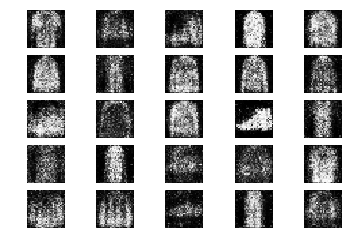

1351 [D loss: 0.618675, acc.: 68.75%] [G loss: 0.868897]
1352 [D loss: 0.609237, acc.: 67.19%] [G loss: 0.898998]
1353 [D loss: 0.671658, acc.: 64.06%] [G loss: 0.825471]
1354 [D loss: 0.613739, acc.: 68.75%] [G loss: 0.900223]
1355 [D loss: 0.654131, acc.: 59.38%] [G loss: 0.837390]
1356 [D loss: 0.595219, acc.: 70.31%] [G loss: 0.890784]
1357 [D loss: 0.637867, acc.: 57.81%] [G loss: 0.944348]
1358 [D loss: 0.586091, acc.: 71.88%] [G loss: 0.898380]
1359 [D loss: 0.559940, acc.: 76.56%] [G loss: 1.022288]
1360 [D loss: 0.653922, acc.: 62.50%] [G loss: 0.867259]
1361 [D loss: 0.613587, acc.: 59.38%] [G loss: 0.924648]
1362 [D loss: 0.572888, acc.: 70.31%] [G loss: 0.887681]
1363 [D loss: 0.569120, acc.: 71.88%] [G loss: 0.951947]
1364 [D loss: 0.604680, acc.: 62.50%] [G loss: 0.977526]
1365 [D loss: 0.597736, acc.: 70.31%] [G loss: 0.937781]
1366 [D loss: 0.585088, acc.: 65.62%] [G loss: 0.903649]
1367 [D loss: 0.627315, acc.: 64.06%] [G loss: 0.899796]
1368 [D loss: 0.661840, acc.: 6

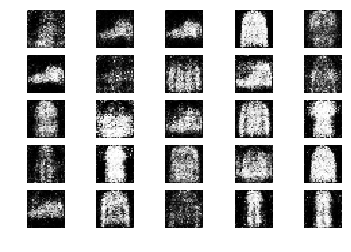

1401 [D loss: 0.626639, acc.: 65.62%] [G loss: 0.929832]
1402 [D loss: 0.605785, acc.: 70.31%] [G loss: 0.935943]
1403 [D loss: 0.598984, acc.: 67.19%] [G loss: 0.968312]
1404 [D loss: 0.597626, acc.: 70.31%] [G loss: 0.897665]
1405 [D loss: 0.591066, acc.: 70.31%] [G loss: 0.912426]
1406 [D loss: 0.645503, acc.: 62.50%] [G loss: 0.969853]
1407 [D loss: 0.623820, acc.: 62.50%] [G loss: 0.810101]
1408 [D loss: 0.607801, acc.: 73.44%] [G loss: 0.940435]
1409 [D loss: 0.544379, acc.: 71.88%] [G loss: 0.955530]
1410 [D loss: 0.598875, acc.: 70.31%] [G loss: 0.974797]
1411 [D loss: 0.605406, acc.: 73.44%] [G loss: 0.863141]
1412 [D loss: 0.544828, acc.: 71.88%] [G loss: 0.927540]
1413 [D loss: 0.688370, acc.: 56.25%] [G loss: 0.966455]
1414 [D loss: 0.620563, acc.: 71.88%] [G loss: 0.899710]
1415 [D loss: 0.633163, acc.: 68.75%] [G loss: 0.871422]
1416 [D loss: 0.574791, acc.: 73.44%] [G loss: 0.945444]
1417 [D loss: 0.630646, acc.: 64.06%] [G loss: 0.959050]
1418 [D loss: 0.586454, acc.: 7

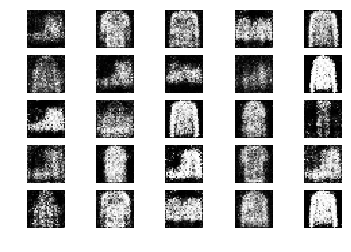

1451 [D loss: 0.546050, acc.: 81.25%] [G loss: 0.899339]
1452 [D loss: 0.685930, acc.: 48.44%] [G loss: 0.874058]
1453 [D loss: 0.611646, acc.: 65.62%] [G loss: 0.835879]
1454 [D loss: 0.590862, acc.: 68.75%] [G loss: 0.807449]
1455 [D loss: 0.598268, acc.: 67.19%] [G loss: 0.831911]
1456 [D loss: 0.549437, acc.: 76.56%] [G loss: 0.940122]
1457 [D loss: 0.595744, acc.: 67.19%] [G loss: 0.882952]
1458 [D loss: 0.579980, acc.: 75.00%] [G loss: 0.868029]
1459 [D loss: 0.504576, acc.: 79.69%] [G loss: 0.949634]
1460 [D loss: 0.596760, acc.: 73.44%] [G loss: 0.937557]
1461 [D loss: 0.536116, acc.: 76.56%] [G loss: 0.959177]
1462 [D loss: 0.657118, acc.: 64.06%] [G loss: 0.919989]
1463 [D loss: 0.660472, acc.: 65.62%] [G loss: 0.963854]
1464 [D loss: 0.569762, acc.: 70.31%] [G loss: 0.965309]
1465 [D loss: 0.649919, acc.: 60.94%] [G loss: 0.908513]
1466 [D loss: 0.587796, acc.: 75.00%] [G loss: 1.002387]
1467 [D loss: 0.589423, acc.: 75.00%] [G loss: 0.943969]
1468 [D loss: 0.590566, acc.: 6

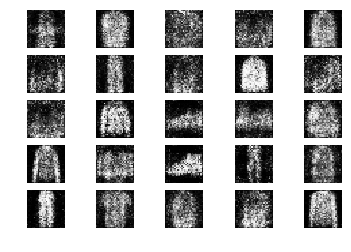

1501 [D loss: 0.605394, acc.: 70.31%] [G loss: 0.955556]
1502 [D loss: 0.601856, acc.: 71.88%] [G loss: 0.907370]
1503 [D loss: 0.521165, acc.: 75.00%] [G loss: 0.954293]
1504 [D loss: 0.602542, acc.: 68.75%] [G loss: 1.009224]
1505 [D loss: 0.573208, acc.: 64.06%] [G loss: 0.986027]
1506 [D loss: 0.645832, acc.: 60.94%] [G loss: 1.068693]
1507 [D loss: 0.540787, acc.: 68.75%] [G loss: 1.061977]
1508 [D loss: 0.680555, acc.: 57.81%] [G loss: 0.880857]
1509 [D loss: 0.608948, acc.: 62.50%] [G loss: 0.879433]
1510 [D loss: 0.511225, acc.: 81.25%] [G loss: 0.873277]
1511 [D loss: 0.525652, acc.: 75.00%] [G loss: 0.939240]
1512 [D loss: 0.623949, acc.: 56.25%] [G loss: 1.002103]
1513 [D loss: 0.595500, acc.: 70.31%] [G loss: 0.941556]
1514 [D loss: 0.586653, acc.: 71.88%] [G loss: 0.974601]
1515 [D loss: 0.649360, acc.: 57.81%] [G loss: 0.905614]
1516 [D loss: 0.572610, acc.: 64.06%] [G loss: 0.867585]
1517 [D loss: 0.744028, acc.: 45.31%] [G loss: 0.838036]
1518 [D loss: 0.531498, acc.: 8

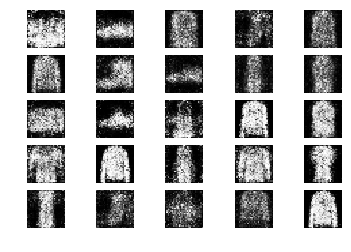

1551 [D loss: 0.592875, acc.: 75.00%] [G loss: 0.908419]
1552 [D loss: 0.662173, acc.: 65.62%] [G loss: 0.901567]
1553 [D loss: 0.678141, acc.: 53.12%] [G loss: 0.893331]
1554 [D loss: 0.625354, acc.: 62.50%] [G loss: 0.801558]
1555 [D loss: 0.560402, acc.: 70.31%] [G loss: 0.839204]
1556 [D loss: 0.563641, acc.: 70.31%] [G loss: 1.020232]
1557 [D loss: 0.630519, acc.: 54.69%] [G loss: 1.012939]
1558 [D loss: 0.525040, acc.: 81.25%] [G loss: 0.871551]
1559 [D loss: 0.589749, acc.: 67.19%] [G loss: 0.876218]
1560 [D loss: 0.634405, acc.: 65.62%] [G loss: 0.902491]
1561 [D loss: 0.624331, acc.: 62.50%] [G loss: 1.026121]
1562 [D loss: 0.626813, acc.: 71.88%] [G loss: 1.004154]
1563 [D loss: 0.606239, acc.: 64.06%] [G loss: 0.967906]
1564 [D loss: 0.621547, acc.: 60.94%] [G loss: 0.927541]
1565 [D loss: 0.618445, acc.: 68.75%] [G loss: 0.896052]
1566 [D loss: 0.605185, acc.: 62.50%] [G loss: 0.903656]
1567 [D loss: 0.611884, acc.: 65.62%] [G loss: 0.914201]
1568 [D loss: 0.624393, acc.: 6

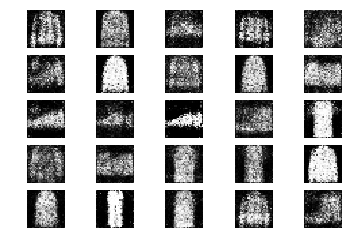

1601 [D loss: 0.595501, acc.: 64.06%] [G loss: 0.964552]
1602 [D loss: 0.631570, acc.: 59.38%] [G loss: 0.973313]
1603 [D loss: 0.648601, acc.: 59.38%] [G loss: 0.929776]
1604 [D loss: 0.657133, acc.: 65.62%] [G loss: 0.932910]
1605 [D loss: 0.642799, acc.: 54.69%] [G loss: 0.967176]
1606 [D loss: 0.609038, acc.: 60.94%] [G loss: 0.985241]
1607 [D loss: 0.634916, acc.: 60.94%] [G loss: 0.909131]
1608 [D loss: 0.603108, acc.: 64.06%] [G loss: 0.870680]
1609 [D loss: 0.613271, acc.: 65.62%] [G loss: 0.941149]
1610 [D loss: 0.587238, acc.: 67.19%] [G loss: 0.942721]
1611 [D loss: 0.578910, acc.: 73.44%] [G loss: 0.909666]
1612 [D loss: 0.628537, acc.: 68.75%] [G loss: 0.892953]
1613 [D loss: 0.559694, acc.: 73.44%] [G loss: 0.974488]
1614 [D loss: 0.586298, acc.: 70.31%] [G loss: 0.803605]
1615 [D loss: 0.665786, acc.: 68.75%] [G loss: 0.770494]
1616 [D loss: 0.610194, acc.: 68.75%] [G loss: 0.893398]
1617 [D loss: 0.650148, acc.: 62.50%] [G loss: 0.939829]
1618 [D loss: 0.545133, acc.: 7

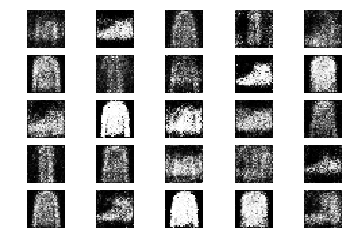

1651 [D loss: 0.547911, acc.: 76.56%] [G loss: 0.927616]
1652 [D loss: 0.653537, acc.: 60.94%] [G loss: 0.933753]
1653 [D loss: 0.604567, acc.: 73.44%] [G loss: 0.859640]
1654 [D loss: 0.619514, acc.: 64.06%] [G loss: 0.911527]
1655 [D loss: 0.604286, acc.: 68.75%] [G loss: 0.947532]
1656 [D loss: 0.673318, acc.: 51.56%] [G loss: 0.931831]
1657 [D loss: 0.621863, acc.: 64.06%] [G loss: 0.851383]
1658 [D loss: 0.666000, acc.: 59.38%] [G loss: 0.929957]
1659 [D loss: 0.612548, acc.: 65.62%] [G loss: 0.949283]
1660 [D loss: 0.585900, acc.: 71.88%] [G loss: 0.875941]
1661 [D loss: 0.603947, acc.: 68.75%] [G loss: 0.875735]
1662 [D loss: 0.675971, acc.: 54.69%] [G loss: 0.913958]
1663 [D loss: 0.540386, acc.: 70.31%] [G loss: 1.018235]
1664 [D loss: 0.584561, acc.: 73.44%] [G loss: 0.884804]
1665 [D loss: 0.610999, acc.: 67.19%] [G loss: 0.922469]
1666 [D loss: 0.569681, acc.: 73.44%] [G loss: 0.932535]
1667 [D loss: 0.661065, acc.: 59.38%] [G loss: 0.956585]
1668 [D loss: 0.605470, acc.: 6

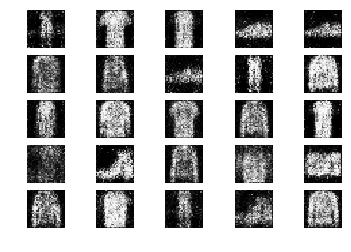

1701 [D loss: 0.612628, acc.: 73.44%] [G loss: 0.944696]
1702 [D loss: 0.580161, acc.: 71.88%] [G loss: 0.923337]
1703 [D loss: 0.666095, acc.: 54.69%] [G loss: 0.983517]
1704 [D loss: 0.568896, acc.: 71.88%] [G loss: 0.874146]
1705 [D loss: 0.604650, acc.: 65.62%] [G loss: 0.839085]
1706 [D loss: 0.578366, acc.: 71.88%] [G loss: 0.933085]
1707 [D loss: 0.643794, acc.: 60.94%] [G loss: 0.901944]
1708 [D loss: 0.653526, acc.: 57.81%] [G loss: 0.849797]
1709 [D loss: 0.648092, acc.: 56.25%] [G loss: 0.925594]
1710 [D loss: 0.574289, acc.: 70.31%] [G loss: 0.881383]
1711 [D loss: 0.625927, acc.: 64.06%] [G loss: 0.937432]
1712 [D loss: 0.583539, acc.: 71.88%] [G loss: 0.947726]
1713 [D loss: 0.612044, acc.: 65.62%] [G loss: 0.952496]
1714 [D loss: 0.605673, acc.: 70.31%] [G loss: 0.947260]
1715 [D loss: 0.544051, acc.: 76.56%] [G loss: 1.070148]
1716 [D loss: 0.556141, acc.: 71.88%] [G loss: 0.918291]
1717 [D loss: 0.671796, acc.: 60.94%] [G loss: 0.970924]
1718 [D loss: 0.623968, acc.: 6

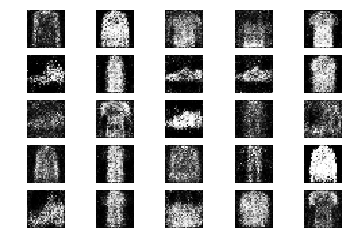

1751 [D loss: 0.586247, acc.: 71.88%] [G loss: 0.915411]
1752 [D loss: 0.588840, acc.: 73.44%] [G loss: 0.999246]
1753 [D loss: 0.579127, acc.: 68.75%] [G loss: 0.986785]
1754 [D loss: 0.611651, acc.: 73.44%] [G loss: 0.941420]
1755 [D loss: 0.575426, acc.: 71.88%] [G loss: 0.992010]
1756 [D loss: 0.557590, acc.: 70.31%] [G loss: 0.920374]
1757 [D loss: 0.580153, acc.: 70.31%] [G loss: 1.006631]
1758 [D loss: 0.570189, acc.: 68.75%] [G loss: 1.040036]
1759 [D loss: 0.601192, acc.: 65.62%] [G loss: 0.893245]
1760 [D loss: 0.597628, acc.: 64.06%] [G loss: 0.899638]
1761 [D loss: 0.620196, acc.: 62.50%] [G loss: 1.001775]
1762 [D loss: 0.576186, acc.: 76.56%] [G loss: 0.978681]
1763 [D loss: 0.586547, acc.: 71.88%] [G loss: 1.035141]
1764 [D loss: 0.606596, acc.: 65.62%] [G loss: 0.927175]
1765 [D loss: 0.658643, acc.: 60.94%] [G loss: 0.848413]
1766 [D loss: 0.617263, acc.: 59.38%] [G loss: 0.909208]
1767 [D loss: 0.562894, acc.: 81.25%] [G loss: 0.895855]
1768 [D loss: 0.669686, acc.: 6

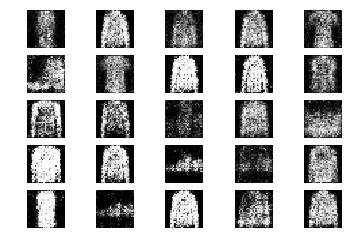

1801 [D loss: 0.639910, acc.: 70.31%] [G loss: 0.966286]
1802 [D loss: 0.648774, acc.: 59.38%] [G loss: 0.949352]
1803 [D loss: 0.656817, acc.: 59.38%] [G loss: 0.842366]
1804 [D loss: 0.599291, acc.: 62.50%] [G loss: 0.941513]
1805 [D loss: 0.622861, acc.: 59.38%] [G loss: 0.826423]
1806 [D loss: 0.604192, acc.: 68.75%] [G loss: 0.894141]
1807 [D loss: 0.638186, acc.: 62.50%] [G loss: 1.039461]
1808 [D loss: 0.584225, acc.: 73.44%] [G loss: 0.997371]
1809 [D loss: 0.525967, acc.: 73.44%] [G loss: 0.903472]
1810 [D loss: 0.575346, acc.: 70.31%] [G loss: 0.984079]
1811 [D loss: 0.600178, acc.: 68.75%] [G loss: 1.010210]
1812 [D loss: 0.670688, acc.: 59.38%] [G loss: 0.932873]
1813 [D loss: 0.602415, acc.: 67.19%] [G loss: 1.053055]
1814 [D loss: 0.648343, acc.: 65.62%] [G loss: 0.927608]
1815 [D loss: 0.611742, acc.: 64.06%] [G loss: 0.927945]
1816 [D loss: 0.584319, acc.: 62.50%] [G loss: 0.936699]
1817 [D loss: 0.587873, acc.: 73.44%] [G loss: 0.982581]
1818 [D loss: 0.619387, acc.: 6

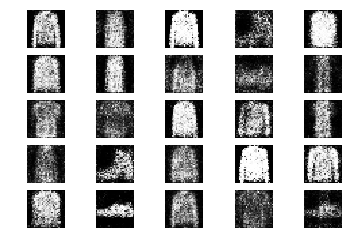

1851 [D loss: 0.585424, acc.: 67.19%] [G loss: 0.976923]
1852 [D loss: 0.639382, acc.: 60.94%] [G loss: 0.939361]
1853 [D loss: 0.552333, acc.: 70.31%] [G loss: 1.000270]
1854 [D loss: 0.646602, acc.: 67.19%] [G loss: 0.962518]
1855 [D loss: 0.664793, acc.: 57.81%] [G loss: 0.977181]
1856 [D loss: 0.645011, acc.: 56.25%] [G loss: 0.876865]
1857 [D loss: 0.617984, acc.: 67.19%] [G loss: 0.973677]
1858 [D loss: 0.617591, acc.: 65.62%] [G loss: 0.874752]
1859 [D loss: 0.601557, acc.: 67.19%] [G loss: 0.862818]
1860 [D loss: 0.617543, acc.: 67.19%] [G loss: 1.028199]
1861 [D loss: 0.609590, acc.: 64.06%] [G loss: 0.941055]
1862 [D loss: 0.550812, acc.: 79.69%] [G loss: 0.993346]
1863 [D loss: 0.636548, acc.: 64.06%] [G loss: 0.873295]
1864 [D loss: 0.568044, acc.: 73.44%] [G loss: 0.990298]
1865 [D loss: 0.648627, acc.: 65.62%] [G loss: 0.914993]
1866 [D loss: 0.664883, acc.: 54.69%] [G loss: 0.904483]
1867 [D loss: 0.552796, acc.: 73.44%] [G loss: 1.006633]
1868 [D loss: 0.524824, acc.: 8

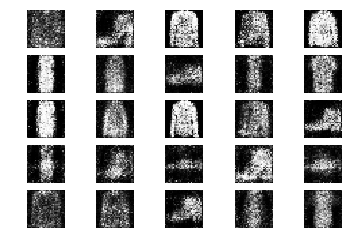

1901 [D loss: 0.608099, acc.: 64.06%] [G loss: 0.937716]
1902 [D loss: 0.643955, acc.: 56.25%] [G loss: 0.962748]
1903 [D loss: 0.584903, acc.: 64.06%] [G loss: 0.989595]
1904 [D loss: 0.604097, acc.: 65.62%] [G loss: 0.939184]
1905 [D loss: 0.587341, acc.: 75.00%] [G loss: 0.927056]
1906 [D loss: 0.566530, acc.: 68.75%] [G loss: 0.976509]
1907 [D loss: 0.573945, acc.: 71.88%] [G loss: 0.933214]
1908 [D loss: 0.692761, acc.: 60.94%] [G loss: 0.987125]
1909 [D loss: 0.614679, acc.: 59.38%] [G loss: 1.070615]
1910 [D loss: 0.614786, acc.: 62.50%] [G loss: 1.064309]
1911 [D loss: 0.572310, acc.: 68.75%] [G loss: 0.958748]
1912 [D loss: 0.583986, acc.: 68.75%] [G loss: 0.948210]
1913 [D loss: 0.635279, acc.: 54.69%] [G loss: 0.988274]
1914 [D loss: 0.688572, acc.: 54.69%] [G loss: 0.901812]
1915 [D loss: 0.620102, acc.: 67.19%] [G loss: 0.950761]
1916 [D loss: 0.642569, acc.: 67.19%] [G loss: 0.953100]
1917 [D loss: 0.625606, acc.: 62.50%] [G loss: 0.855688]
1918 [D loss: 0.631071, acc.: 7

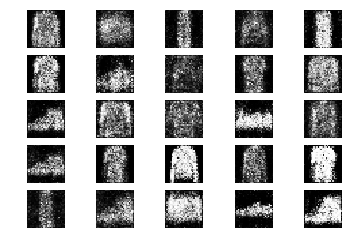

1951 [D loss: 0.568385, acc.: 73.44%] [G loss: 0.886051]
1952 [D loss: 0.663918, acc.: 59.38%] [G loss: 0.878483]
1953 [D loss: 0.672741, acc.: 51.56%] [G loss: 0.961484]
1954 [D loss: 0.606780, acc.: 68.75%] [G loss: 0.904599]
1955 [D loss: 0.618584, acc.: 64.06%] [G loss: 0.927649]
1956 [D loss: 0.638805, acc.: 57.81%] [G loss: 0.980353]
1957 [D loss: 0.556939, acc.: 71.88%] [G loss: 1.043693]
1958 [D loss: 0.565966, acc.: 76.56%] [G loss: 0.973151]
1959 [D loss: 0.586648, acc.: 65.62%] [G loss: 0.849916]
1960 [D loss: 0.582132, acc.: 71.88%] [G loss: 0.946140]
1961 [D loss: 0.561116, acc.: 70.31%] [G loss: 0.882139]
1962 [D loss: 0.577744, acc.: 59.38%] [G loss: 0.862868]
1963 [D loss: 0.672916, acc.: 59.38%] [G loss: 0.921192]
1964 [D loss: 0.579274, acc.: 67.19%] [G loss: 0.996522]
1965 [D loss: 0.680144, acc.: 64.06%] [G loss: 0.959018]
1966 [D loss: 0.588979, acc.: 71.88%] [G loss: 0.952450]
1967 [D loss: 0.603581, acc.: 65.62%] [G loss: 0.945046]
1968 [D loss: 0.625742, acc.: 7

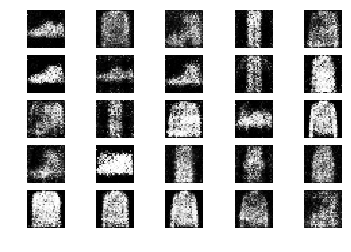

2001 [D loss: 0.628505, acc.: 65.62%] [G loss: 0.881151]
2002 [D loss: 0.646686, acc.: 68.75%] [G loss: 0.974627]
2003 [D loss: 0.638449, acc.: 62.50%] [G loss: 0.941546]
2004 [D loss: 0.559893, acc.: 67.19%] [G loss: 0.944506]
2005 [D loss: 0.608533, acc.: 68.75%] [G loss: 0.910061]
2006 [D loss: 0.596004, acc.: 65.62%] [G loss: 0.907263]
2007 [D loss: 0.654779, acc.: 60.94%] [G loss: 1.032434]
2008 [D loss: 0.567857, acc.: 68.75%] [G loss: 1.033650]
2009 [D loss: 0.635451, acc.: 64.06%] [G loss: 0.949802]
2010 [D loss: 0.645149, acc.: 62.50%] [G loss: 0.958511]
2011 [D loss: 0.634187, acc.: 60.94%] [G loss: 0.866159]
2012 [D loss: 0.539241, acc.: 76.56%] [G loss: 0.992000]
2013 [D loss: 0.520388, acc.: 78.12%] [G loss: 1.005010]
2014 [D loss: 0.603848, acc.: 71.88%] [G loss: 0.952460]
2015 [D loss: 0.636218, acc.: 64.06%] [G loss: 0.988405]
2016 [D loss: 0.605019, acc.: 70.31%] [G loss: 0.957309]
2017 [D loss: 0.584580, acc.: 67.19%] [G loss: 0.893617]
2018 [D loss: 0.633695, acc.: 6

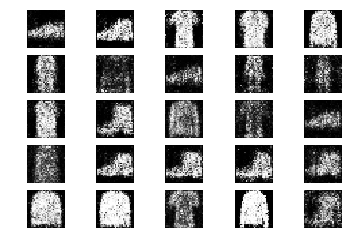

2051 [D loss: 0.613293, acc.: 78.12%] [G loss: 1.042993]
2052 [D loss: 0.605535, acc.: 68.75%] [G loss: 0.915375]
2053 [D loss: 0.668883, acc.: 53.12%] [G loss: 0.822589]
2054 [D loss: 0.722099, acc.: 53.12%] [G loss: 0.823017]
2055 [D loss: 0.559813, acc.: 73.44%] [G loss: 0.942586]
2056 [D loss: 0.599627, acc.: 67.19%] [G loss: 0.998719]
2057 [D loss: 0.603395, acc.: 67.19%] [G loss: 1.004525]
2058 [D loss: 0.567906, acc.: 75.00%] [G loss: 0.935520]
2059 [D loss: 0.575481, acc.: 70.31%] [G loss: 0.999056]
2060 [D loss: 0.605114, acc.: 68.75%] [G loss: 0.942603]
2061 [D loss: 0.649610, acc.: 65.62%] [G loss: 0.870358]
2062 [D loss: 0.635856, acc.: 53.12%] [G loss: 0.864249]
2063 [D loss: 0.628698, acc.: 60.94%] [G loss: 0.965451]
2064 [D loss: 0.678691, acc.: 54.69%] [G loss: 1.010934]
2065 [D loss: 0.590994, acc.: 71.88%] [G loss: 0.913653]
2066 [D loss: 0.637372, acc.: 62.50%] [G loss: 0.971067]
2067 [D loss: 0.553294, acc.: 73.44%] [G loss: 0.991215]
2068 [D loss: 0.662336, acc.: 5

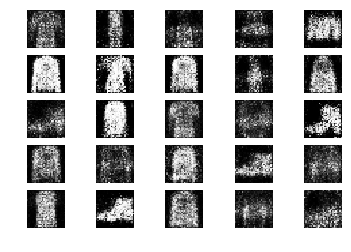

2101 [D loss: 0.609073, acc.: 60.94%] [G loss: 0.999644]
2102 [D loss: 0.630073, acc.: 64.06%] [G loss: 0.940560]
2103 [D loss: 0.615792, acc.: 60.94%] [G loss: 0.933929]
2104 [D loss: 0.640974, acc.: 60.94%] [G loss: 1.009519]
2105 [D loss: 0.649576, acc.: 62.50%] [G loss: 1.001545]
2106 [D loss: 0.575131, acc.: 78.12%] [G loss: 1.056614]
2107 [D loss: 0.613071, acc.: 65.62%] [G loss: 0.969437]
2108 [D loss: 0.669218, acc.: 53.12%] [G loss: 0.984196]
2109 [D loss: 0.633463, acc.: 64.06%] [G loss: 0.931589]
2110 [D loss: 0.639407, acc.: 57.81%] [G loss: 0.860872]
2111 [D loss: 0.557752, acc.: 65.62%] [G loss: 1.002221]
2112 [D loss: 0.607105, acc.: 64.06%] [G loss: 1.015921]
2113 [D loss: 0.607859, acc.: 67.19%] [G loss: 0.984053]
2114 [D loss: 0.555220, acc.: 70.31%] [G loss: 1.098493]
2115 [D loss: 0.611579, acc.: 60.94%] [G loss: 0.948988]
2116 [D loss: 0.612693, acc.: 68.75%] [G loss: 0.933215]
2117 [D loss: 0.628166, acc.: 59.38%] [G loss: 1.092098]
2118 [D loss: 0.666815, acc.: 5

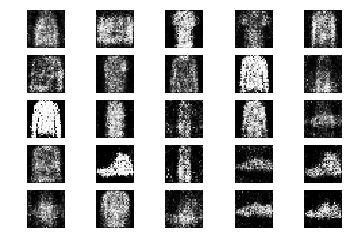

2151 [D loss: 0.557213, acc.: 75.00%] [G loss: 0.965105]
2152 [D loss: 0.591125, acc.: 71.88%] [G loss: 0.960507]
2153 [D loss: 0.590330, acc.: 67.19%] [G loss: 0.972802]
2154 [D loss: 0.572870, acc.: 73.44%] [G loss: 0.931336]
2155 [D loss: 0.568972, acc.: 71.88%] [G loss: 0.968452]
2156 [D loss: 0.605931, acc.: 70.31%] [G loss: 0.944644]
2157 [D loss: 0.602315, acc.: 68.75%] [G loss: 0.940167]
2158 [D loss: 0.603747, acc.: 67.19%] [G loss: 0.951180]
2159 [D loss: 0.667895, acc.: 64.06%] [G loss: 0.955605]
2160 [D loss: 0.673874, acc.: 48.44%] [G loss: 0.996481]
2161 [D loss: 0.589640, acc.: 67.19%] [G loss: 1.047198]
2162 [D loss: 0.542744, acc.: 70.31%] [G loss: 0.983846]
2163 [D loss: 0.553908, acc.: 79.69%] [G loss: 1.085094]
2164 [D loss: 0.649541, acc.: 67.19%] [G loss: 1.025151]
2165 [D loss: 0.548058, acc.: 81.25%] [G loss: 0.948862]
2166 [D loss: 0.595360, acc.: 71.88%] [G loss: 0.978003]
2167 [D loss: 0.657739, acc.: 64.06%] [G loss: 0.982823]
2168 [D loss: 0.538565, acc.: 8

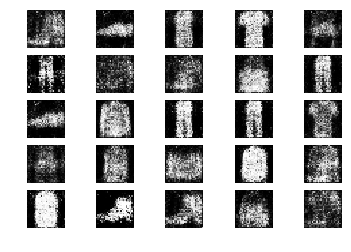

2201 [D loss: 0.624739, acc.: 62.50%] [G loss: 0.932871]
2202 [D loss: 0.580952, acc.: 68.75%] [G loss: 0.913486]
2203 [D loss: 0.647221, acc.: 65.62%] [G loss: 0.885258]
2204 [D loss: 0.625739, acc.: 60.94%] [G loss: 0.953848]
2205 [D loss: 0.613268, acc.: 67.19%] [G loss: 1.000645]
2206 [D loss: 0.545468, acc.: 76.56%] [G loss: 0.978493]
2207 [D loss: 0.596781, acc.: 71.88%] [G loss: 0.959145]
2208 [D loss: 0.667114, acc.: 50.00%] [G loss: 1.018999]
2209 [D loss: 0.581215, acc.: 73.44%] [G loss: 1.017297]
2210 [D loss: 0.602366, acc.: 70.31%] [G loss: 1.044855]
2211 [D loss: 0.605889, acc.: 65.62%] [G loss: 0.981280]
2212 [D loss: 0.513636, acc.: 76.56%] [G loss: 0.947584]
2213 [D loss: 0.625232, acc.: 65.62%] [G loss: 1.042239]
2214 [D loss: 0.594067, acc.: 71.88%] [G loss: 1.059758]
2215 [D loss: 0.742985, acc.: 53.12%] [G loss: 1.012377]
2216 [D loss: 0.647815, acc.: 68.75%] [G loss: 1.012435]
2217 [D loss: 0.625892, acc.: 67.19%] [G loss: 0.834718]
2218 [D loss: 0.595097, acc.: 7

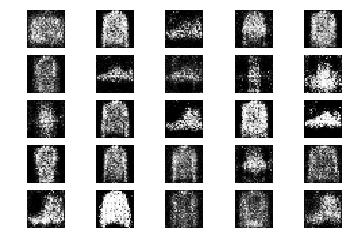

2251 [D loss: 0.595504, acc.: 65.62%] [G loss: 1.053222]
2252 [D loss: 0.592459, acc.: 68.75%] [G loss: 0.887402]
2253 [D loss: 0.694392, acc.: 48.44%] [G loss: 0.961696]
2254 [D loss: 0.593653, acc.: 68.75%] [G loss: 1.094305]
2255 [D loss: 0.532036, acc.: 75.00%] [G loss: 1.014937]
2256 [D loss: 0.638452, acc.: 60.94%] [G loss: 1.062780]
2257 [D loss: 0.628669, acc.: 62.50%] [G loss: 0.993873]
2258 [D loss: 0.565346, acc.: 75.00%] [G loss: 0.872888]
2259 [D loss: 0.647609, acc.: 67.19%] [G loss: 0.981344]
2260 [D loss: 0.592612, acc.: 68.75%] [G loss: 1.087261]
2261 [D loss: 0.659827, acc.: 65.62%] [G loss: 0.974998]
2262 [D loss: 0.626361, acc.: 73.44%] [G loss: 0.889394]
2263 [D loss: 0.637177, acc.: 60.94%] [G loss: 0.959359]
2264 [D loss: 0.595258, acc.: 65.62%] [G loss: 1.005404]
2265 [D loss: 0.647803, acc.: 62.50%] [G loss: 0.974283]
2266 [D loss: 0.609246, acc.: 62.50%] [G loss: 1.007867]
2267 [D loss: 0.642530, acc.: 68.75%] [G loss: 0.941292]
2268 [D loss: 0.609541, acc.: 6

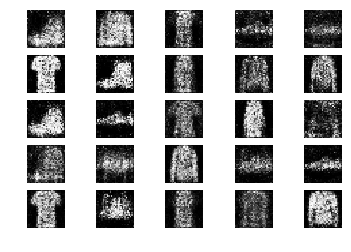

2301 [D loss: 0.597478, acc.: 70.31%] [G loss: 1.001447]
2302 [D loss: 0.592079, acc.: 65.62%] [G loss: 0.868716]
2303 [D loss: 0.609468, acc.: 62.50%] [G loss: 0.985552]
2304 [D loss: 0.615006, acc.: 67.19%] [G loss: 0.927249]
2305 [D loss: 0.597364, acc.: 71.88%] [G loss: 0.985343]
2306 [D loss: 0.622404, acc.: 62.50%] [G loss: 1.026406]
2307 [D loss: 0.601721, acc.: 68.75%] [G loss: 0.932270]
2308 [D loss: 0.586589, acc.: 68.75%] [G loss: 1.075756]
2309 [D loss: 0.598907, acc.: 64.06%] [G loss: 0.958963]
2310 [D loss: 0.556041, acc.: 73.44%] [G loss: 1.042588]
2311 [D loss: 0.672832, acc.: 56.25%] [G loss: 0.920870]
2312 [D loss: 0.553201, acc.: 64.06%] [G loss: 0.949652]
2313 [D loss: 0.598442, acc.: 62.50%] [G loss: 0.932760]
2314 [D loss: 0.594413, acc.: 65.62%] [G loss: 0.893945]
2315 [D loss: 0.512172, acc.: 76.56%] [G loss: 1.025640]
2316 [D loss: 0.642948, acc.: 62.50%] [G loss: 0.963364]
2317 [D loss: 0.612835, acc.: 60.94%] [G loss: 0.926170]
2318 [D loss: 0.651702, acc.: 6

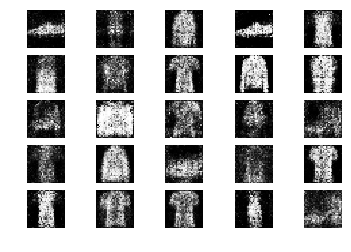

2351 [D loss: 0.618965, acc.: 64.06%] [G loss: 0.964117]
2352 [D loss: 0.603599, acc.: 60.94%] [G loss: 1.021902]
2353 [D loss: 0.620308, acc.: 64.06%] [G loss: 1.045524]
2354 [D loss: 0.608144, acc.: 68.75%] [G loss: 1.024629]
2355 [D loss: 0.666931, acc.: 51.56%] [G loss: 0.874742]
2356 [D loss: 0.567118, acc.: 70.31%] [G loss: 0.877527]
2357 [D loss: 0.608643, acc.: 62.50%] [G loss: 0.876089]
2358 [D loss: 0.653344, acc.: 59.38%] [G loss: 0.874831]
2359 [D loss: 0.572175, acc.: 73.44%] [G loss: 0.916655]
2360 [D loss: 0.662530, acc.: 56.25%] [G loss: 0.948226]
2361 [D loss: 0.570108, acc.: 67.19%] [G loss: 1.011524]
2362 [D loss: 0.607120, acc.: 68.75%] [G loss: 0.945365]
2363 [D loss: 0.611429, acc.: 70.31%] [G loss: 0.832201]
2364 [D loss: 0.619050, acc.: 60.94%] [G loss: 0.986778]
2365 [D loss: 0.621857, acc.: 62.50%] [G loss: 0.961750]
2366 [D loss: 0.559972, acc.: 65.62%] [G loss: 0.953831]
2367 [D loss: 0.641281, acc.: 64.06%] [G loss: 0.963264]
2368 [D loss: 0.604338, acc.: 6

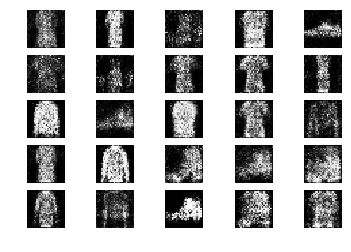

2401 [D loss: 0.649582, acc.: 64.06%] [G loss: 0.944802]
2402 [D loss: 0.576996, acc.: 73.44%] [G loss: 0.971195]
2403 [D loss: 0.656468, acc.: 57.81%] [G loss: 0.964301]
2404 [D loss: 0.553630, acc.: 71.88%] [G loss: 0.920456]
2405 [D loss: 0.625172, acc.: 62.50%] [G loss: 0.993030]
2406 [D loss: 0.637010, acc.: 59.38%] [G loss: 1.020028]
2407 [D loss: 0.659089, acc.: 54.69%] [G loss: 0.999509]
2408 [D loss: 0.584753, acc.: 68.75%] [G loss: 1.041616]
2409 [D loss: 0.574520, acc.: 75.00%] [G loss: 0.947404]
2410 [D loss: 0.601264, acc.: 64.06%] [G loss: 1.085757]
2411 [D loss: 0.540667, acc.: 76.56%] [G loss: 1.000666]
2412 [D loss: 0.637255, acc.: 64.06%] [G loss: 0.974282]
2413 [D loss: 0.549278, acc.: 73.44%] [G loss: 0.964100]
2414 [D loss: 0.606815, acc.: 64.06%] [G loss: 0.887461]
2415 [D loss: 0.606018, acc.: 67.19%] [G loss: 0.845768]
2416 [D loss: 0.528864, acc.: 78.12%] [G loss: 0.954871]
2417 [D loss: 0.545378, acc.: 75.00%] [G loss: 1.022744]
2418 [D loss: 0.551803, acc.: 6

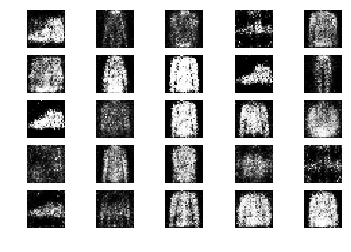

2451 [D loss: 0.536335, acc.: 76.56%] [G loss: 1.019367]
2452 [D loss: 0.594621, acc.: 65.62%] [G loss: 0.988305]
2453 [D loss: 0.590387, acc.: 68.75%] [G loss: 0.897556]
2454 [D loss: 0.574479, acc.: 73.44%] [G loss: 0.977998]
2455 [D loss: 0.565211, acc.: 73.44%] [G loss: 0.992732]
2456 [D loss: 0.514031, acc.: 82.81%] [G loss: 0.989524]
2457 [D loss: 0.648162, acc.: 64.06%] [G loss: 1.065581]
2458 [D loss: 0.584303, acc.: 68.75%] [G loss: 0.920920]
2459 [D loss: 0.654718, acc.: 62.50%] [G loss: 1.019922]
2460 [D loss: 0.612381, acc.: 60.94%] [G loss: 1.087391]
2461 [D loss: 0.596692, acc.: 68.75%] [G loss: 1.154901]
2462 [D loss: 0.609275, acc.: 60.94%] [G loss: 1.116249]
2463 [D loss: 0.592335, acc.: 75.00%] [G loss: 1.008391]
2464 [D loss: 0.626140, acc.: 56.25%] [G loss: 0.968544]
2465 [D loss: 0.626954, acc.: 59.38%] [G loss: 1.006326]
2466 [D loss: 0.611927, acc.: 65.62%] [G loss: 0.928232]
2467 [D loss: 0.607380, acc.: 67.19%] [G loss: 0.898592]
2468 [D loss: 0.567310, acc.: 7

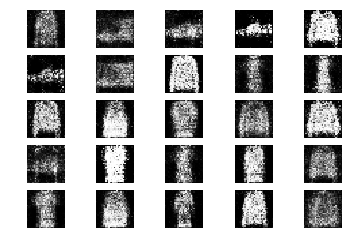

2501 [D loss: 0.639359, acc.: 60.94%] [G loss: 0.957726]
2502 [D loss: 0.554407, acc.: 71.88%] [G loss: 0.985820]
2503 [D loss: 0.625939, acc.: 57.81%] [G loss: 0.905507]
2504 [D loss: 0.668463, acc.: 57.81%] [G loss: 0.967302]
2505 [D loss: 0.587843, acc.: 68.75%] [G loss: 0.984597]
2506 [D loss: 0.613998, acc.: 64.06%] [G loss: 0.993098]
2507 [D loss: 0.618980, acc.: 67.19%] [G loss: 0.870536]
2508 [D loss: 0.635226, acc.: 59.38%] [G loss: 0.974863]
2509 [D loss: 0.634021, acc.: 59.38%] [G loss: 0.962581]
2510 [D loss: 0.551990, acc.: 75.00%] [G loss: 1.024195]
2511 [D loss: 0.540336, acc.: 71.88%] [G loss: 0.987786]
2512 [D loss: 0.563150, acc.: 70.31%] [G loss: 0.966956]
2513 [D loss: 0.678715, acc.: 64.06%] [G loss: 0.999260]
2514 [D loss: 0.570314, acc.: 73.44%] [G loss: 0.939309]
2515 [D loss: 0.598673, acc.: 70.31%] [G loss: 0.969889]
2516 [D loss: 0.546582, acc.: 75.00%] [G loss: 0.953479]
2517 [D loss: 0.578387, acc.: 71.88%] [G loss: 0.953942]
2518 [D loss: 0.603835, acc.: 6

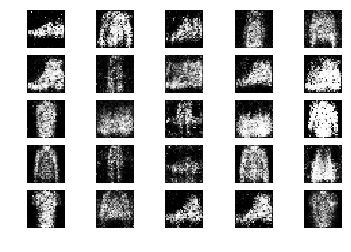

2551 [D loss: 0.625631, acc.: 64.06%] [G loss: 0.983373]
2552 [D loss: 0.540181, acc.: 73.44%] [G loss: 1.042197]
2553 [D loss: 0.654055, acc.: 57.81%] [G loss: 1.034418]
2554 [D loss: 0.600107, acc.: 71.88%] [G loss: 1.005942]
2555 [D loss: 0.665053, acc.: 59.38%] [G loss: 1.009902]
2556 [D loss: 0.653786, acc.: 60.94%] [G loss: 1.016373]
2557 [D loss: 0.610299, acc.: 68.75%] [G loss: 0.967196]
2558 [D loss: 0.602163, acc.: 67.19%] [G loss: 1.005242]
2559 [D loss: 0.609798, acc.: 60.94%] [G loss: 1.082880]
2560 [D loss: 0.660043, acc.: 54.69%] [G loss: 1.068165]
2561 [D loss: 0.647772, acc.: 59.38%] [G loss: 0.973573]
2562 [D loss: 0.536111, acc.: 81.25%] [G loss: 0.948029]
2563 [D loss: 0.671457, acc.: 59.38%] [G loss: 0.852111]
2564 [D loss: 0.629436, acc.: 70.31%] [G loss: 1.026348]
2565 [D loss: 0.584896, acc.: 68.75%] [G loss: 1.022423]
2566 [D loss: 0.659628, acc.: 57.81%] [G loss: 1.005134]
2567 [D loss: 0.629696, acc.: 62.50%] [G loss: 0.951543]
2568 [D loss: 0.586760, acc.: 7

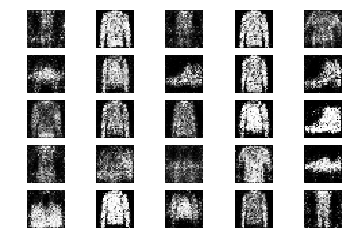

2601 [D loss: 0.576033, acc.: 70.31%] [G loss: 1.005038]
2602 [D loss: 0.589874, acc.: 60.94%] [G loss: 0.968640]
2603 [D loss: 0.601853, acc.: 62.50%] [G loss: 1.061389]
2604 [D loss: 0.624897, acc.: 68.75%] [G loss: 0.914781]
2605 [D loss: 0.614443, acc.: 64.06%] [G loss: 0.945019]
2606 [D loss: 0.623621, acc.: 65.62%] [G loss: 0.900358]
2607 [D loss: 0.592429, acc.: 65.62%] [G loss: 0.936542]
2608 [D loss: 0.705464, acc.: 50.00%] [G loss: 0.952677]
2609 [D loss: 0.533012, acc.: 82.81%] [G loss: 1.072915]
2610 [D loss: 0.559260, acc.: 76.56%] [G loss: 0.931870]
2611 [D loss: 0.685548, acc.: 64.06%] [G loss: 0.987131]
2612 [D loss: 0.563561, acc.: 68.75%] [G loss: 1.049854]
2613 [D loss: 0.615505, acc.: 60.94%] [G loss: 0.893284]
2614 [D loss: 0.639272, acc.: 65.62%] [G loss: 0.984879]
2615 [D loss: 0.548828, acc.: 76.56%] [G loss: 0.999801]
2616 [D loss: 0.684797, acc.: 56.25%] [G loss: 0.933276]
2617 [D loss: 0.544376, acc.: 70.31%] [G loss: 0.982470]
2618 [D loss: 0.614678, acc.: 5

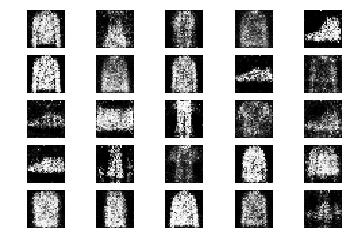

2651 [D loss: 0.606524, acc.: 71.88%] [G loss: 1.009848]
2652 [D loss: 0.567608, acc.: 78.12%] [G loss: 0.993450]
2653 [D loss: 0.527983, acc.: 75.00%] [G loss: 0.998820]
2654 [D loss: 0.654169, acc.: 64.06%] [G loss: 0.986375]
2655 [D loss: 0.654819, acc.: 62.50%] [G loss: 0.897489]
2656 [D loss: 0.619888, acc.: 71.88%] [G loss: 0.967961]
2657 [D loss: 0.582135, acc.: 59.38%] [G loss: 1.064837]
2658 [D loss: 0.590992, acc.: 75.00%] [G loss: 0.921799]
2659 [D loss: 0.602175, acc.: 68.75%] [G loss: 0.923118]
2660 [D loss: 0.656369, acc.: 57.81%] [G loss: 0.874915]
2661 [D loss: 0.606530, acc.: 67.19%] [G loss: 0.950796]
2662 [D loss: 0.620917, acc.: 65.62%] [G loss: 0.962788]
2663 [D loss: 0.613550, acc.: 62.50%] [G loss: 1.067000]
2664 [D loss: 0.575054, acc.: 70.31%] [G loss: 1.081987]
2665 [D loss: 0.631432, acc.: 65.62%] [G loss: 1.046116]
2666 [D loss: 0.651865, acc.: 56.25%] [G loss: 1.083776]
2667 [D loss: 0.594261, acc.: 73.44%] [G loss: 1.050921]
2668 [D loss: 0.576849, acc.: 7

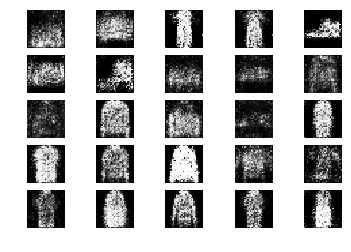

2701 [D loss: 0.655426, acc.: 57.81%] [G loss: 0.953975]
2702 [D loss: 0.545851, acc.: 75.00%] [G loss: 1.020298]
2703 [D loss: 0.627649, acc.: 62.50%] [G loss: 0.942167]
2704 [D loss: 0.639083, acc.: 60.94%] [G loss: 0.929695]
2705 [D loss: 0.571099, acc.: 71.88%] [G loss: 0.979577]
2706 [D loss: 0.581798, acc.: 68.75%] [G loss: 0.928590]
2707 [D loss: 0.556720, acc.: 73.44%] [G loss: 0.978675]
2708 [D loss: 0.576932, acc.: 71.88%] [G loss: 1.051182]
2709 [D loss: 0.667626, acc.: 56.25%] [G loss: 0.901066]
2710 [D loss: 0.691452, acc.: 60.94%] [G loss: 1.015830]
2711 [D loss: 0.566456, acc.: 67.19%] [G loss: 0.930395]
2712 [D loss: 0.651096, acc.: 64.06%] [G loss: 0.991502]
2713 [D loss: 0.615765, acc.: 67.19%] [G loss: 1.098348]
2714 [D loss: 0.667330, acc.: 59.38%] [G loss: 0.958801]
2715 [D loss: 0.562172, acc.: 75.00%] [G loss: 0.930634]
2716 [D loss: 0.660981, acc.: 56.25%] [G loss: 0.927288]
2717 [D loss: 0.574155, acc.: 70.31%] [G loss: 0.942566]
2718 [D loss: 0.560249, acc.: 6

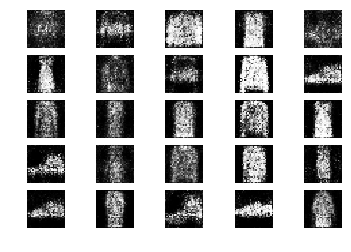

2751 [D loss: 0.583858, acc.: 75.00%] [G loss: 0.954594]
2752 [D loss: 0.645024, acc.: 64.06%] [G loss: 0.931459]
2753 [D loss: 0.597773, acc.: 68.75%] [G loss: 0.966343]
2754 [D loss: 0.564918, acc.: 71.88%] [G loss: 0.954146]
2755 [D loss: 0.561066, acc.: 71.88%] [G loss: 0.964790]
2756 [D loss: 0.595448, acc.: 70.31%] [G loss: 0.996762]
2757 [D loss: 0.600630, acc.: 56.25%] [G loss: 1.031428]
2758 [D loss: 0.673758, acc.: 56.25%] [G loss: 0.918127]
2759 [D loss: 0.554833, acc.: 78.12%] [G loss: 0.921231]
2760 [D loss: 0.634611, acc.: 64.06%] [G loss: 0.893795]
2761 [D loss: 0.574058, acc.: 75.00%] [G loss: 0.940217]
2762 [D loss: 0.558619, acc.: 75.00%] [G loss: 0.927899]
2763 [D loss: 0.690440, acc.: 51.56%] [G loss: 0.936498]
2764 [D loss: 0.559904, acc.: 71.88%] [G loss: 0.922562]
2765 [D loss: 0.575644, acc.: 73.44%] [G loss: 0.947070]
2766 [D loss: 0.616463, acc.: 65.62%] [G loss: 0.873939]
2767 [D loss: 0.620469, acc.: 64.06%] [G loss: 1.036192]
2768 [D loss: 0.669465, acc.: 6

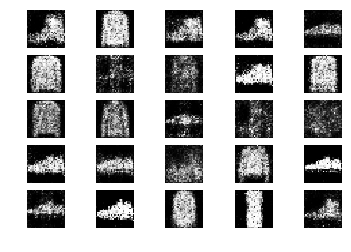

2801 [D loss: 0.571008, acc.: 65.62%] [G loss: 0.822461]
2802 [D loss: 0.679788, acc.: 56.25%] [G loss: 0.930974]
2803 [D loss: 0.641559, acc.: 60.94%] [G loss: 0.963456]
2804 [D loss: 0.620420, acc.: 60.94%] [G loss: 0.954402]
2805 [D loss: 0.613607, acc.: 68.75%] [G loss: 1.047333]
2806 [D loss: 0.558625, acc.: 73.44%] [G loss: 0.963875]
2807 [D loss: 0.696412, acc.: 62.50%] [G loss: 0.888200]
2808 [D loss: 0.637846, acc.: 62.50%] [G loss: 0.978269]
2809 [D loss: 0.633538, acc.: 65.62%] [G loss: 0.960503]
2810 [D loss: 0.630782, acc.: 57.81%] [G loss: 1.066240]
2811 [D loss: 0.599729, acc.: 67.19%] [G loss: 0.975602]
2812 [D loss: 0.634315, acc.: 64.06%] [G loss: 0.996120]
2813 [D loss: 0.673085, acc.: 62.50%] [G loss: 0.932671]
2814 [D loss: 0.624770, acc.: 56.25%] [G loss: 0.889509]
2815 [D loss: 0.633591, acc.: 62.50%] [G loss: 0.952419]
2816 [D loss: 0.664934, acc.: 59.38%] [G loss: 0.909619]
2817 [D loss: 0.543041, acc.: 73.44%] [G loss: 0.962894]
2818 [D loss: 0.655926, acc.: 5

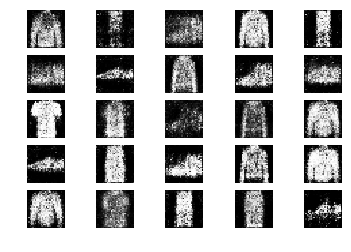

2851 [D loss: 0.558025, acc.: 70.31%] [G loss: 0.977172]
2852 [D loss: 0.621289, acc.: 60.94%] [G loss: 0.951204]
2853 [D loss: 0.663072, acc.: 60.94%] [G loss: 0.950941]
2854 [D loss: 0.646598, acc.: 59.38%] [G loss: 0.905752]
2855 [D loss: 0.573910, acc.: 67.19%] [G loss: 1.007719]
2856 [D loss: 0.615209, acc.: 60.94%] [G loss: 0.984453]
2857 [D loss: 0.635058, acc.: 60.94%] [G loss: 1.026438]
2858 [D loss: 0.664350, acc.: 56.25%] [G loss: 1.002573]
2859 [D loss: 0.524406, acc.: 76.56%] [G loss: 0.888211]
2860 [D loss: 0.578303, acc.: 70.31%] [G loss: 0.923230]
2861 [D loss: 0.656828, acc.: 60.94%] [G loss: 0.938154]
2862 [D loss: 0.589327, acc.: 68.75%] [G loss: 0.965567]
2863 [D loss: 0.602497, acc.: 64.06%] [G loss: 0.979892]
2864 [D loss: 0.620901, acc.: 59.38%] [G loss: 0.954366]
2865 [D loss: 0.585480, acc.: 70.31%] [G loss: 0.975183]
2866 [D loss: 0.629325, acc.: 51.56%] [G loss: 1.004402]
2867 [D loss: 0.590999, acc.: 73.44%] [G loss: 1.109957]
2868 [D loss: 0.641527, acc.: 5

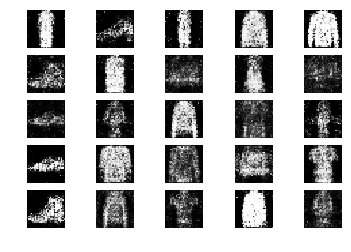

2901 [D loss: 0.687710, acc.: 57.81%] [G loss: 0.836170]
2902 [D loss: 0.592348, acc.: 71.88%] [G loss: 0.987713]
2903 [D loss: 0.587354, acc.: 65.62%] [G loss: 0.883762]
2904 [D loss: 0.645703, acc.: 56.25%] [G loss: 0.995478]
2905 [D loss: 0.569851, acc.: 76.56%] [G loss: 1.016804]
2906 [D loss: 0.593619, acc.: 70.31%] [G loss: 1.091720]
2907 [D loss: 0.579620, acc.: 68.75%] [G loss: 1.078446]
2908 [D loss: 0.682578, acc.: 56.25%] [G loss: 0.969877]
2909 [D loss: 0.623318, acc.: 67.19%] [G loss: 0.938266]
2910 [D loss: 0.665783, acc.: 62.50%] [G loss: 0.937068]
2911 [D loss: 0.641408, acc.: 60.94%] [G loss: 0.945443]
2912 [D loss: 0.556066, acc.: 73.44%] [G loss: 1.042043]
2913 [D loss: 0.568965, acc.: 71.88%] [G loss: 1.058564]
2914 [D loss: 0.570155, acc.: 70.31%] [G loss: 1.042811]
2915 [D loss: 0.616841, acc.: 67.19%] [G loss: 0.925531]
2916 [D loss: 0.614386, acc.: 67.19%] [G loss: 1.025815]
2917 [D loss: 0.638054, acc.: 73.44%] [G loss: 1.030767]
2918 [D loss: 0.663370, acc.: 6

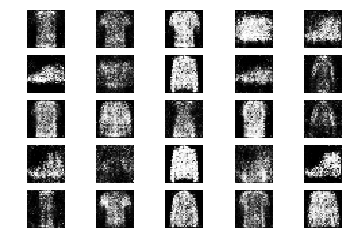

2951 [D loss: 0.633307, acc.: 54.69%] [G loss: 0.991680]
2952 [D loss: 0.578059, acc.: 71.88%] [G loss: 1.016074]
2953 [D loss: 0.627058, acc.: 67.19%] [G loss: 0.922376]
2954 [D loss: 0.541397, acc.: 75.00%] [G loss: 0.900060]
2955 [D loss: 0.624440, acc.: 70.31%] [G loss: 1.096064]
2956 [D loss: 0.685084, acc.: 56.25%] [G loss: 0.968122]
2957 [D loss: 0.620599, acc.: 64.06%] [G loss: 0.906949]
2958 [D loss: 0.601195, acc.: 64.06%] [G loss: 0.882425]
2959 [D loss: 0.600390, acc.: 65.62%] [G loss: 0.970535]
2960 [D loss: 0.609012, acc.: 62.50%] [G loss: 0.866323]
2961 [D loss: 0.652654, acc.: 54.69%] [G loss: 1.021024]
2962 [D loss: 0.597069, acc.: 68.75%] [G loss: 1.004707]
2963 [D loss: 0.627135, acc.: 57.81%] [G loss: 1.057681]
2964 [D loss: 0.631419, acc.: 60.94%] [G loss: 0.977031]
2965 [D loss: 0.619139, acc.: 65.62%] [G loss: 1.023277]
2966 [D loss: 0.558262, acc.: 71.88%] [G loss: 0.951803]
2967 [D loss: 0.598687, acc.: 67.19%] [G loss: 0.967253]
2968 [D loss: 0.624715, acc.: 6

In [12]:
epochs = 3000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % 50 == 0:
    sample_images(epoch)

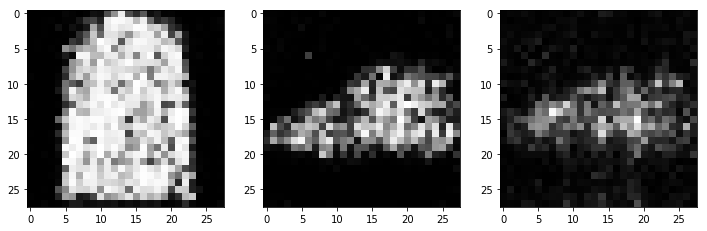

In [13]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()